# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

                                    Описание проекта
Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. 
 
                                     Описание данных
Признаки
DateCrawled — дата скачивания анкеты из базы
VehicleType — тип автомобильного кузова
RegistrationYear — год регистрации автомобиля
Gearbox — тип коробки передач
Power — мощность (л. с.)
Model — модель автомобиля
Kilometer — пробег (км)
RegistrationMonth — месяц регистрации автомобиля
FuelType — тип топлива
Brand — марка автомобиля
NotRepaired — была машина в ремонте или нет
DateCreated — дата создания анкеты
NumberOfPictures — количество фотографий автомобиля
PostalCode — почтовый индекс владельца анкеты (пользователя)
LastSeen — дата последней активности пользователя
Целевой признак
Price — цена (евро)

## Подготовка данных

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

!pip install scikit-plot
import scikitplot as skplt
pd.set_option('display.float_format', '{:.3f}'.format) 

!pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMRegressor

!pip install optuna
import joblib 
import optuna 
from optuna.samplers import TPESampler 

!pip install catboost
from catboost import Pool,CatBoost
from catboost import CatBoostRegressor
from catboost.utils import eval_metric

import time
from time import time

In [2]:
try:
    data = pd.read_csv('/datasets/autos.csv')
    
except:
    data = pd.read_csv('C:/Users/анатолий/Documents/datasets/autos.csv')

In [3]:
display(data.head(15))
data.shape

DateCrawled  Price  VehicleType  RegistrationYear Gearbox  Power  \
0   2016-03-24 11:52:17    480          NaN              1993  manual      0   
1   2016-03-24 10:58:45  18300        coupe              2011  manual    190   
2   2016-03-14 12:52:21   9800          suv              2004    auto    163   
3   2016-03-17 16:54:04   1500        small              2001  manual     75   
4   2016-03-31 17:25:20   3600        small              2008  manual     69   
5   2016-04-04 17:36:23    650        sedan              1995  manual    102   
6   2016-04-01 20:48:51   2200  convertible              2004  manual    109   
7   2016-03-21 18:54:38      0        sedan              1980  manual     50   
8   2016-04-04 23:42:13  14500          bus              2014  manual    125   
9   2016-03-17 10:53:50    999        small              1998  manual    101   
10  2016-03-26 19:54:18   2000        sedan              2004  manual    105   
11  2016-04-07 10:06:22   2799        wagon              2005  manual    140   
12  2016-03-15 22:49:09    999        wagon              1995  manual    115   
13  2016-03-21 21:37:40   2500        wagon              2004  manual    131   
14  2016-03-21 12:57:01  17999          suv              2011  manual    190   

      Model  Kilometer  RegistrationMonth  FuelType       Brand NotRepaired  \
0      golf     150000                  0    petrol  volkswagen         NaN   
1       NaN     125000                  5  gasoline        audi         yes   
2     grand     125000                  8  gasoline        jeep         NaN   
3      golf     150000                  6    petrol  volkswagen          no   
4     fabia      90000                  7  gasoline       skoda          no   
5       3er     150000                 10    petrol         bmw         yes   
6   2_reihe     150000                  8    petrol     peugeot          no   
7     other      40000                  7    petrol  volkswagen          no   
8     c_max      30000                  8    petrol        ford         NaN   
9      golf     150000                  0       NaN  volkswagen         NaN   
10  3_reihe     150000                 12    petrol       mazda          no   
11   passat     150000                 12  gasoline  volkswagen         yes   
12   passat     150000                 11    petrol  volkswagen         NaN   
13   passat     150000                  2       NaN  volkswagen          no   
14   navara      70000                  3  gasoline      nissan          no   

            DateCreated  NumberOfPictures  PostalCode             LastSeen  
0   2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1   2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2   2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3   2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4   2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21  
5   2016-04-04 00:00:00                 0       33775  2016-04-06 19:17:07  
6   2016-04-01 00:00:00                 0       67112  2016-04-05 18:18:39  
7   2016-03-21 00:00:00                 0       19348  2016-03-25 16:47:58  
8   2016-04-04 00:00:00                 0       94505  2016-04-04 23:42:13  
9   2016-03-17 00:00:00                 0       27472  2016-03-31 17:17:06  
10  2016-03-26 00:00:00                 0       96224  2016-04-06 10:45:34  
11  2016-04-07 00:00:00                 0       57290  2016-04-07 10:25:17  
12  2016-03-15 00:00:00                 0       37269  2016-04-01 13:16:16  
13  2016-03-21 00:00:00                 0       90762  2016-03-23 02:50:54  
14  2016-03-21 00:00:00                 0        4177  2016-04-06 07:45:42

(354369, 16)

Sweetviz - это замечательная и очень полезная библиотека Python, которая предоставляет нам EDA данного набора данных всего с 2 строками кода. Он генерирует независимый отчет HTML-страницы с интерактивными визуализациями набора данных. Это может сэкономить много нашего времени, которое в противном случае было бы потрачено на выполнение EDA вручную. Это также спасает нас от ошибок, которые мы могли бы ввести, делая что-то самостоятельно.

Функциональные возможности, предоставляемые Sweetviz
Sweetviz позволяет нам выполнить список различных анализов, как указано ниже.

Анализ одного набора данных - он показывает сводную статистику (min, max, медиану, квантили и т. Д.) О каждом столбце данных, визуализации, показывающие его распределение (гистограммы, квантильные диаграммы и т. Д.), Отсутствующие подсчеты, корреляцию с другими столбцами данных и т. Д.
Анализ целевых переменных - Он включает в себя все детали, упомянутые в анализе одного набора данных, а также связь каждого столбца данных с целевой переменной (столбцом, который мы хотим предсказать в ML). Он также выделяет столбец целевой переменной отдельно в приложении.
Сравнение двух наборов данных (обучение и проверка, обучение против теста, тест против проверки и т. Д.) - Он предоставляет сводную статистику, визуализации отношений, корреляции и т. Д. Детали для двух наборов данных рядом друг с другом. Это может помочь нам понять, как различные столбцы данных распределены в двух разных наборах данных.
Разделите набор данных с помощью логической переменной и сравните их - Этот анализ работает как сравнение только двух наборов данных, но для этого мы не даем два разных набора данных, вместо этого мы даем ряды / список логических значений, и сравнение будет происходить между наборами данных, сгенерированными разделением исходного набора данных на основе этих логических значений True / False. Ряд/список логических значений должен иметь ту же длину, что и исходный набор данных. Логические значения обычно задаются из нашего исходного набора данных, который имеет логические столбцы, такие как гендерный столбец (мужской против женского) и т. Д.

In [4]:
!pip install sweetviz
import sweetviz
print("SweetViz Version : {}".format(sweetviz.__version__))

SweetViz Version : 2.1.4


analyze(source=None,target_feat=None,feat_cf=None,pairwise_analysis='auto') - Этот метод позволяет выполнять EDA на одном наборе данных, заданном в качестве первого параметра (source).
Параметр source принимает в качестве входного кадра данных pandas или кортежа кадра данных и имени набора данных. Имя, указанное в качестве входных данных, будет использоваться в визуализации.
Параметр target_feat принимает в качестве входной строки, которая является целевой переменной. Мы хотим видеть связь между всеми другими столбцами данных и целевой переменной. Этот параметр является необязательным.
Параметр feat_cfg принимает в качестве входного экземпляра FeatureConfig. FeatureConfig позволяет нам объявить, какие столбцы данных должны использоваться как числовые, какие должны использоваться как категориальные, а какие должны использоваться как текст. Это позволяет нам явно указать типы столбцов данных, если мы хотим переопределить параметры по умолчанию.
Pairwise_analysis принимает в качестве входных данных одну из трех входных строк ('auto', 'on' и 'off'). Он покажет корреляцию между различными столбцами на основе этого параметра. По умолчанию используется «auto», который будет показывать корреляцию, когда это возможно. Если мы установим значение как «выключено», то оно не будет показывать связь.
compare(source=None,compare=None,target_feat=None,feat_cfg=None,pairwise_analysis=None) - Этот метод принимает два набора данных в качестве входных данных и позволяет выполнять EDA для обоих одновременно. Он показывает EDA для каждого набора данных рядом друг с другом для лучшего сравнения. Этот метод может быть полезен для выполнения EDA на комбинации наборов данных train/test, train/validation и test/validation.
Параметр source and compare принимает в качестве входного фрейма данных или кортежа кадра данных и имени фрейма данных. Предоставленные имена фреймов данных будут использоваться в визуализациях.
Все остальные параметры работают точно так же, как и в методе analyze().
compare_intra(source_df=None,condition_series=None,names=(),target_feat=None,feat_cfg=None,pairwise_analysis=None) — этот метод принимает в качестве входного набора данных один логический ряд той же длины, что и набор данных. Затем он разделит набор данных на основе логических значений ряда и выполнит EDA для двух наборов данных, сгенерированных таким образом. Он генерирует EDA для обоих наборов данных рядом друг с другом, поэтому мы можем провести сравнение на его основе. Ряд обычно является одним из логических столбцов набора данных, на основе которого мы хотим выполнить EDA.
Набор данных source_df принимает в качестве входной кадра данных панд.
Параметр condition_series принимает в качестве входных логических рядов, на основе которых набор данных будет разделен на два набора данных и между ними будет происходить сравнение.
Все остальные параметры работают точно так же, как и в методах analyze() и compare().
Обратите внимание, что каждый из вышеупомянутых методов возвращает экземпляр DataframeReport. Этот экземпляр имеет два важных метода, которые позволяют нам показывать интерактивные отчеты EDA либо в виде независимого HTML-приложения, либо внутри записной книжки jupyter.


Важные методы объекта DataFrameReport
show_html(filepath='SWEETVIZ_REPORT.html',open_browser=True,layout='widescreen',scale=None) - Этот метод откроет отчет в браузере как отдельное приложение. Затем мы можем взаимодействовать с ним и смотреть на результаты EDA.
show_notebook(w=None,h=None,scale=None,layout=None,filepath=None) - Этот метод откроет отчет о результатах EDA внутри записной книжки jupyter. Это позволило нам обеспечить ширину и высоту с помощью параметров.
1. Анализ одного набора данных 
Ниже мы сгенерировали отчет EDA для набора данных wine с использованием метода analyze(). Он возвращает экземпляр типа DataframeReport. Затем мы можем использовать его для отображения отчетов.

                                             |                                             | [  0%]   00:00 ->…


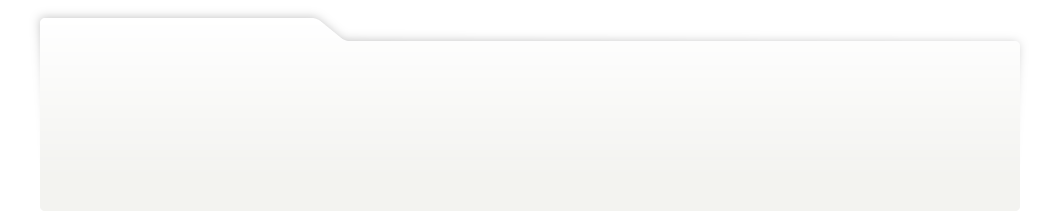
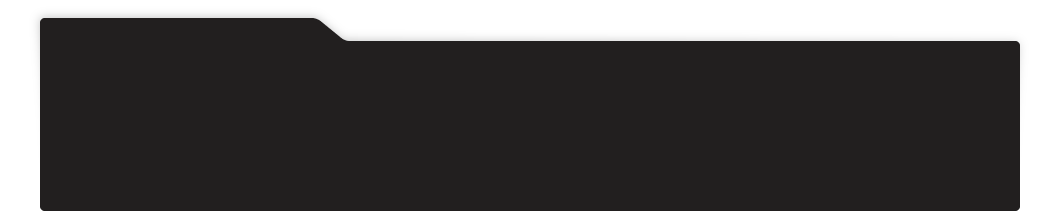
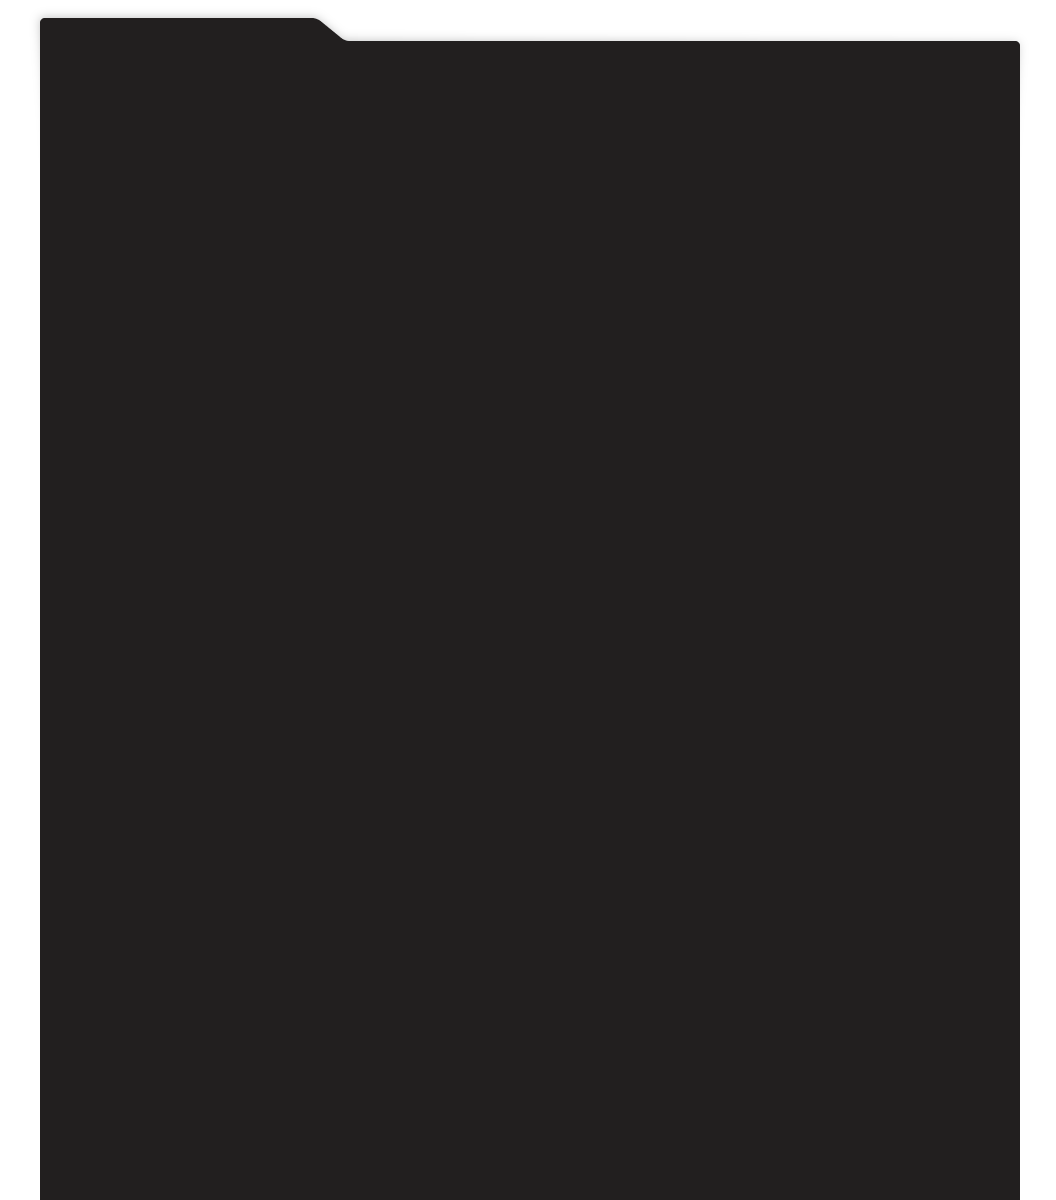
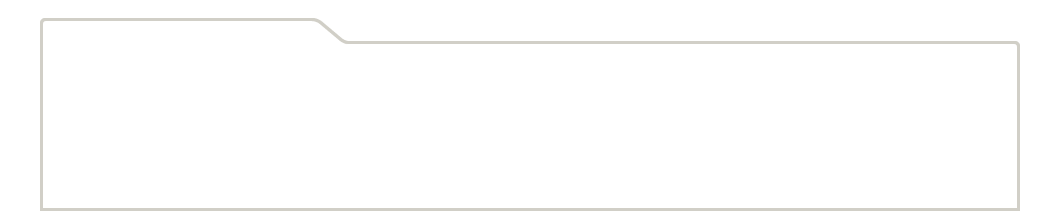
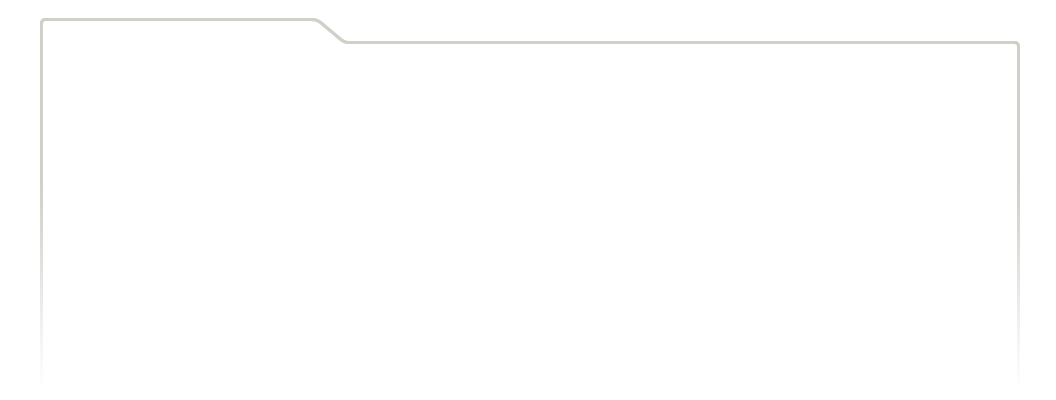
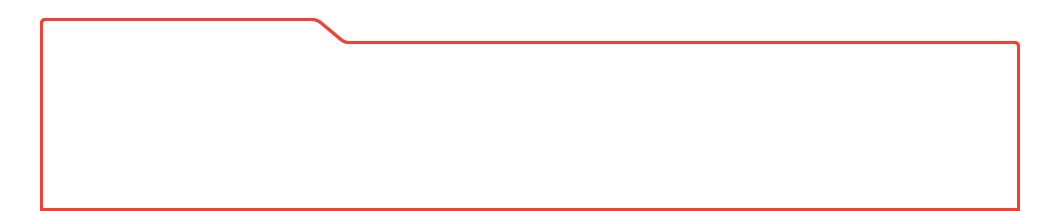
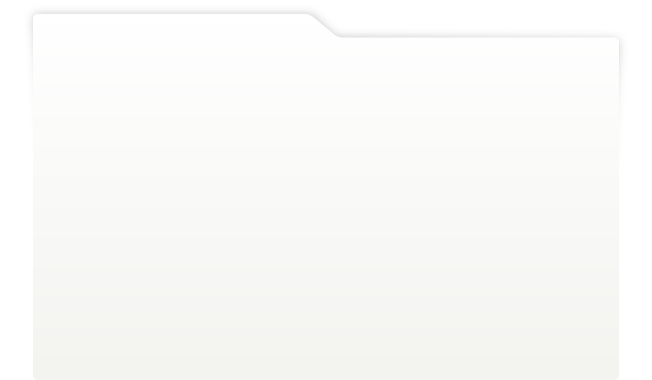
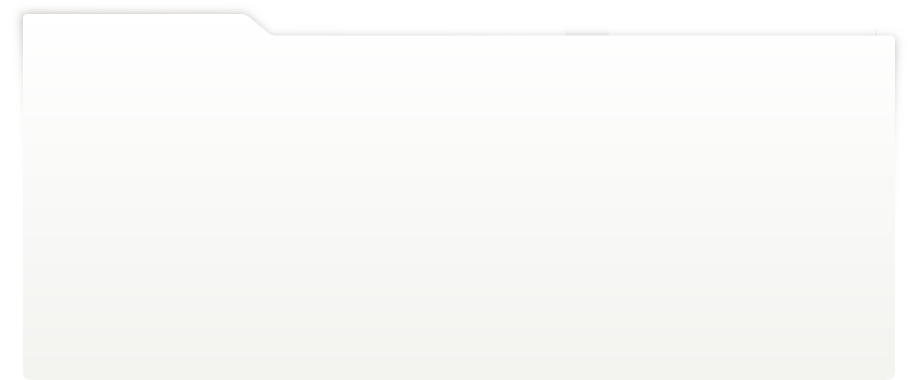
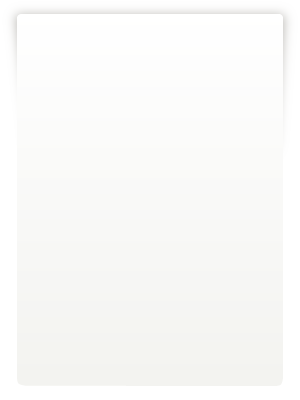
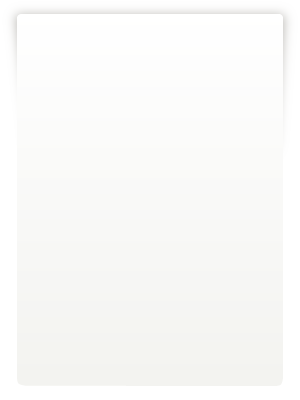
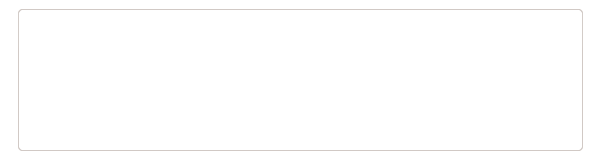
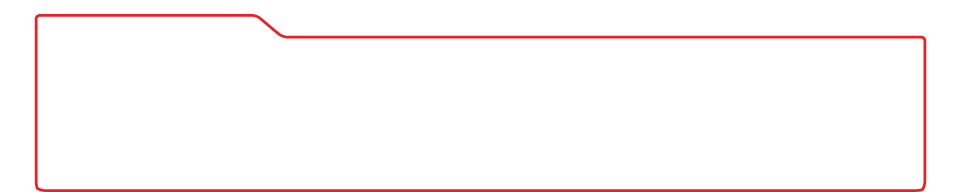
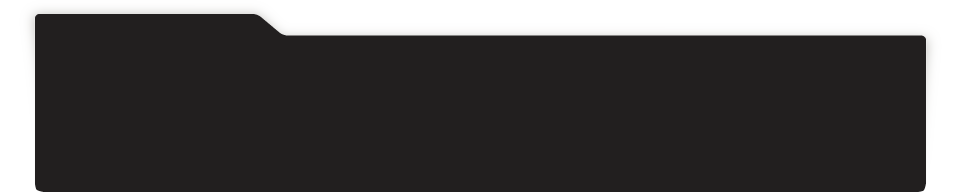
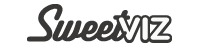
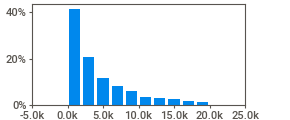
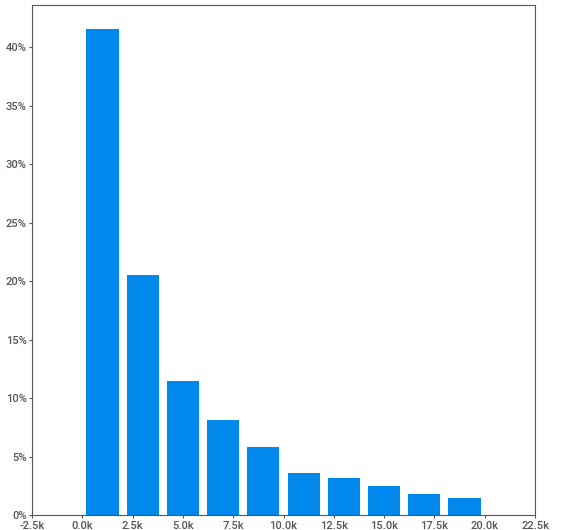
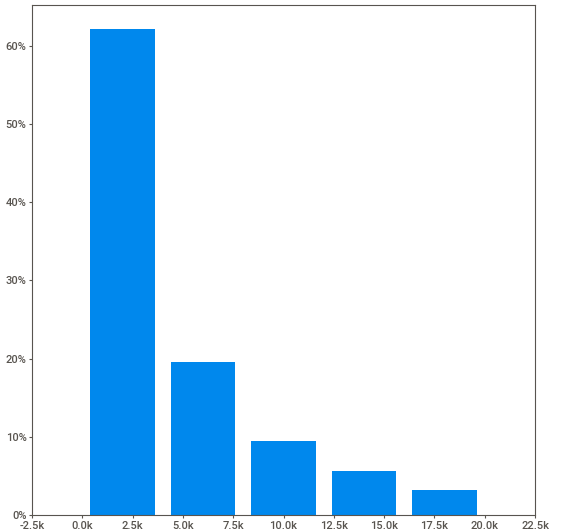
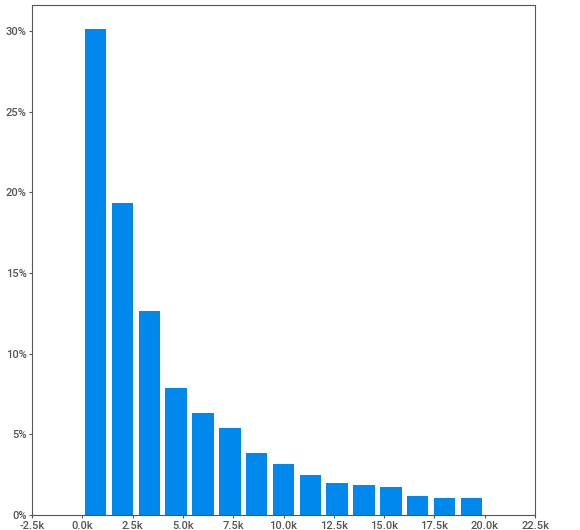
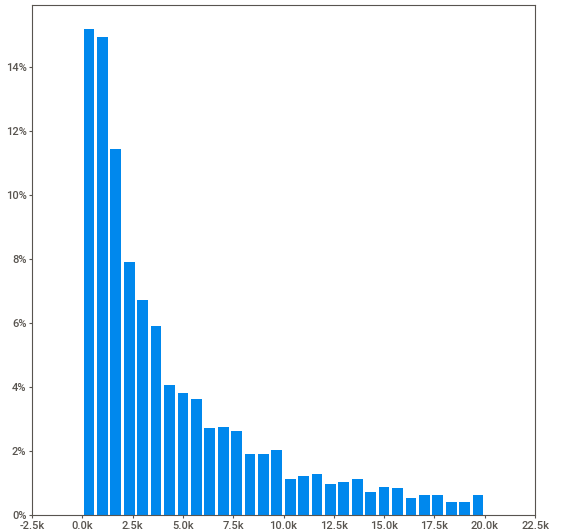
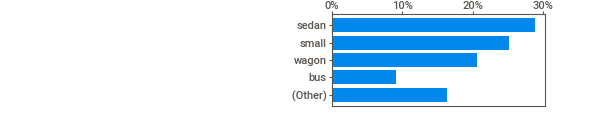
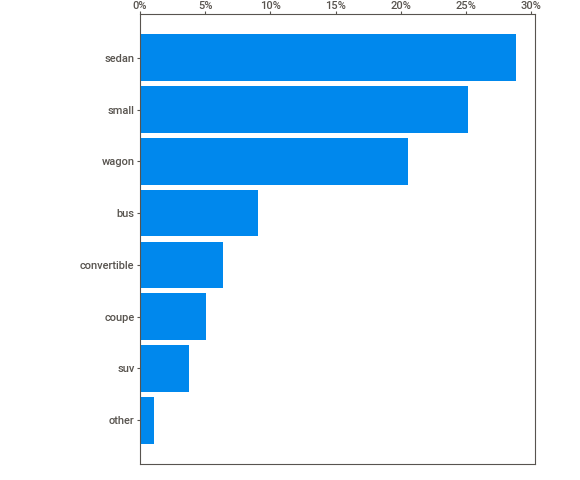
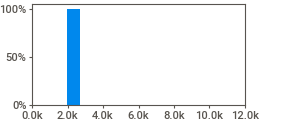
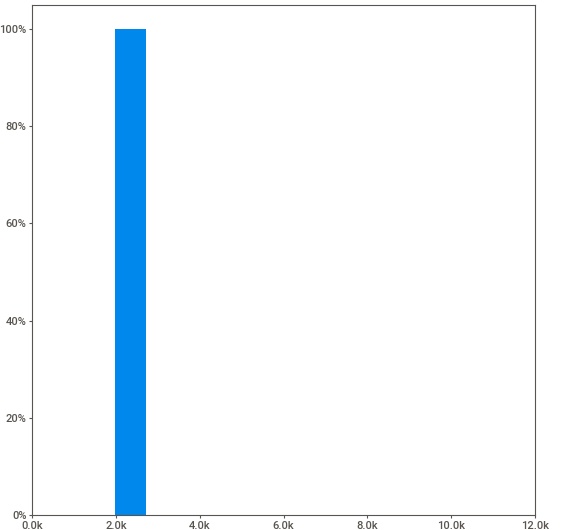
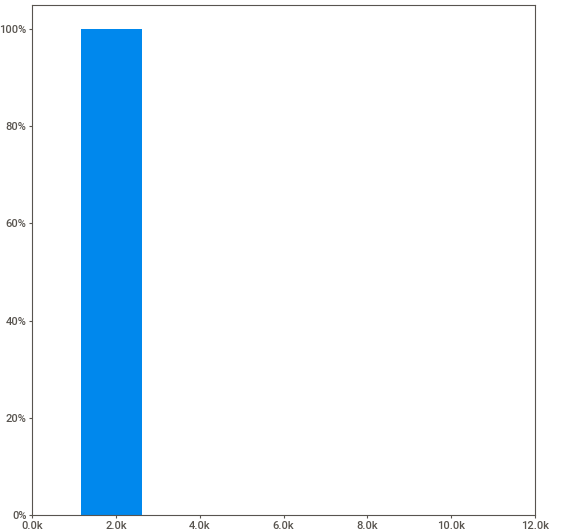
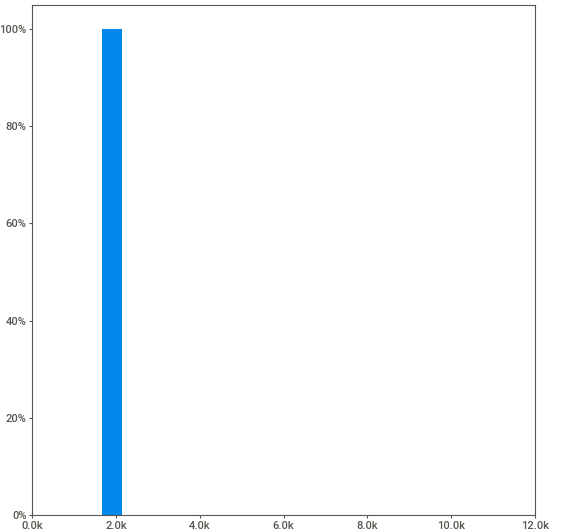
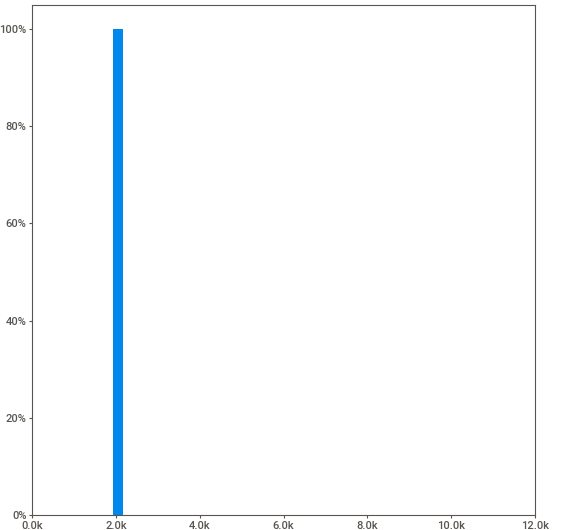
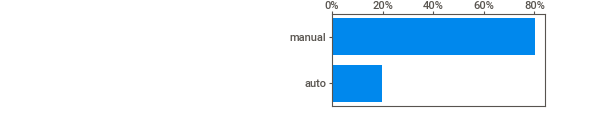
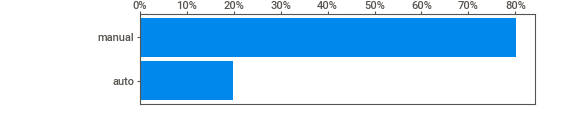
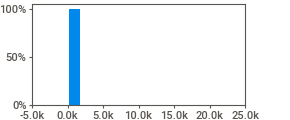
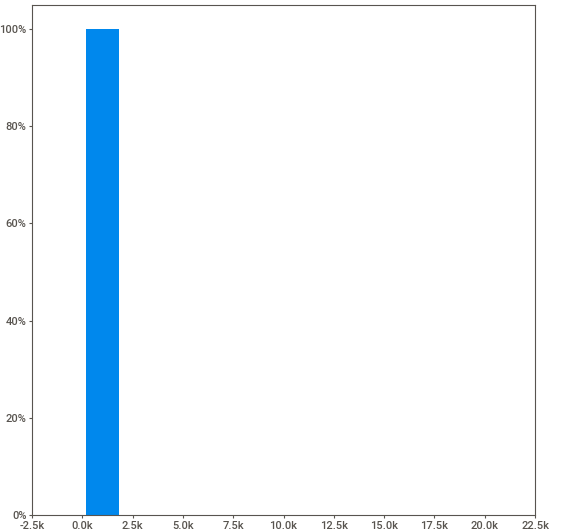
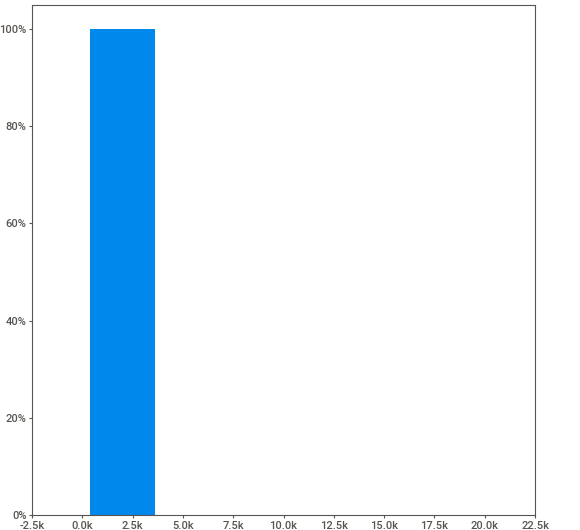
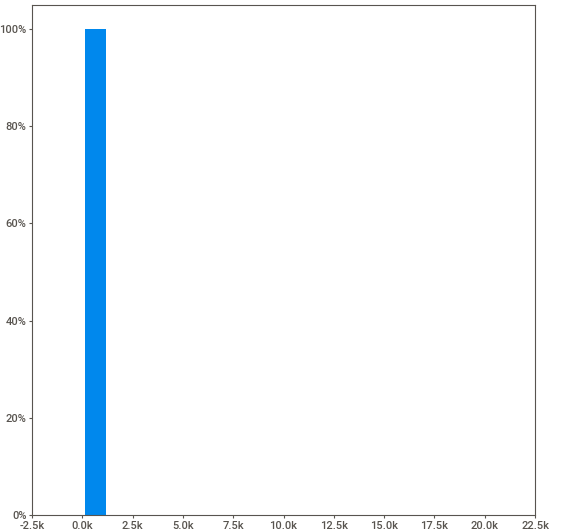
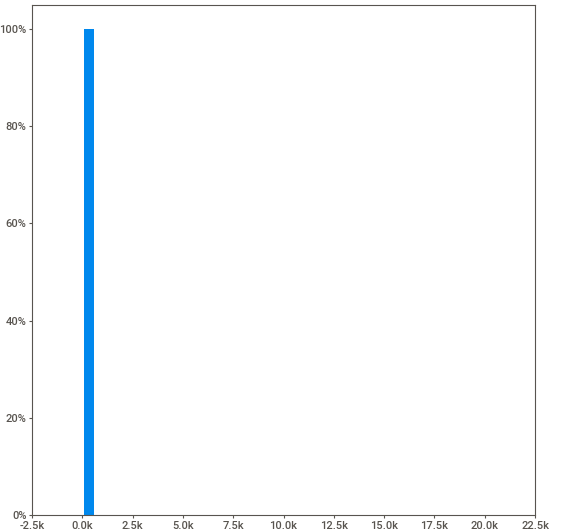
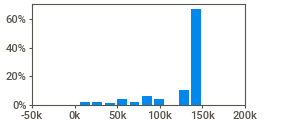
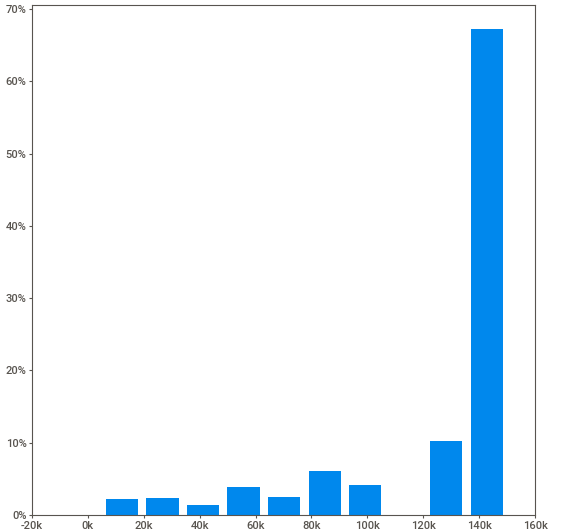
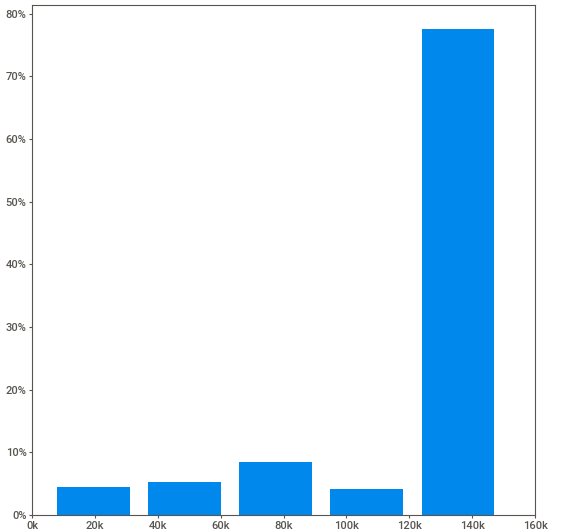
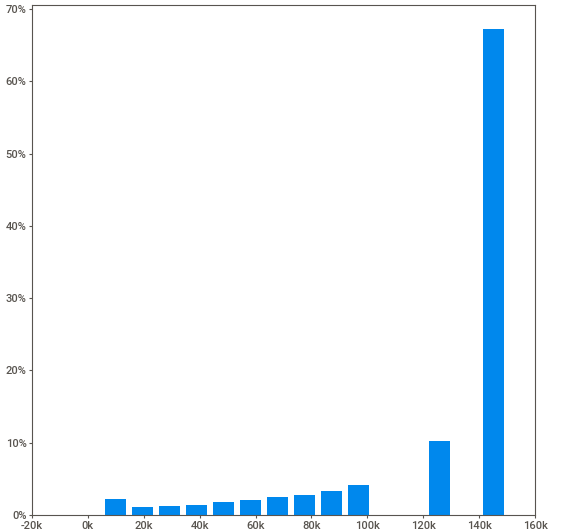
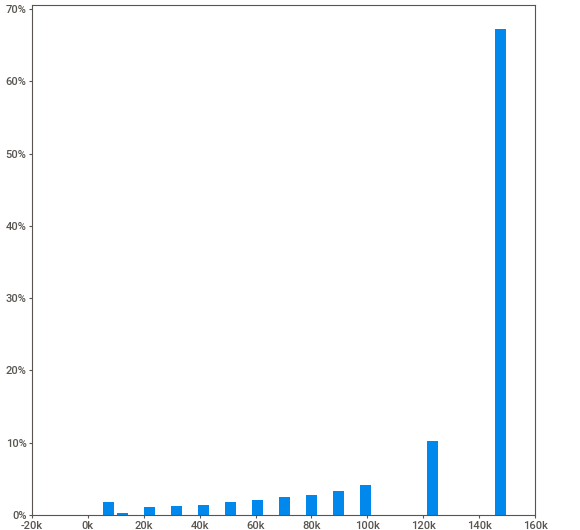
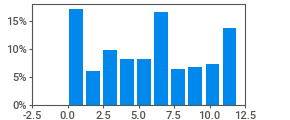
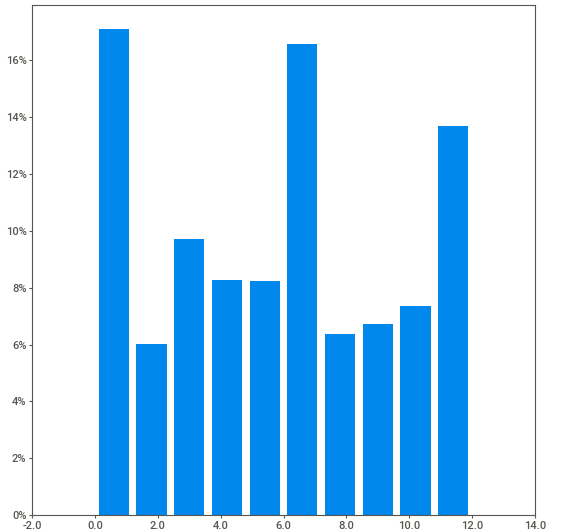
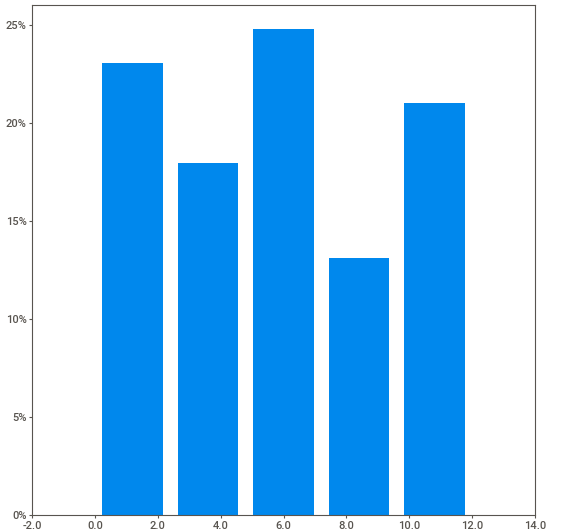
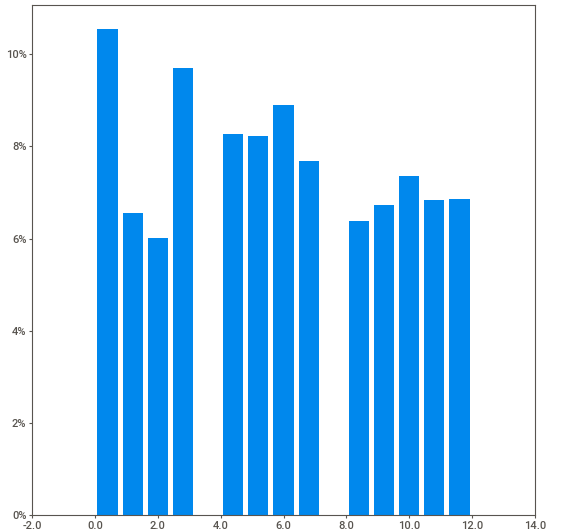
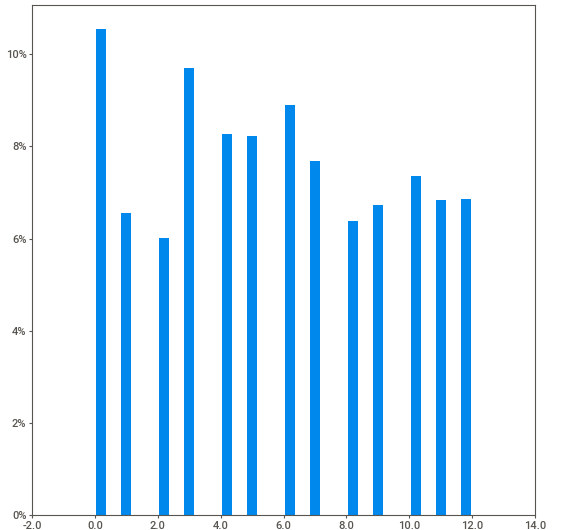
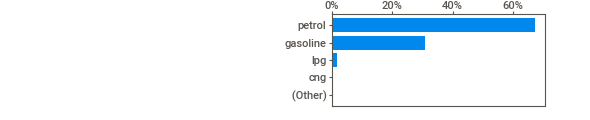
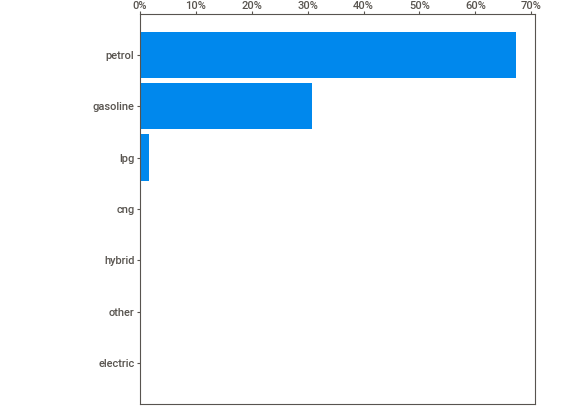
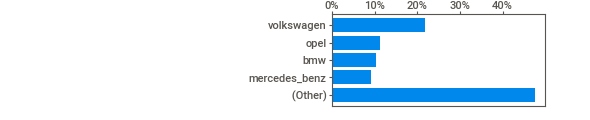
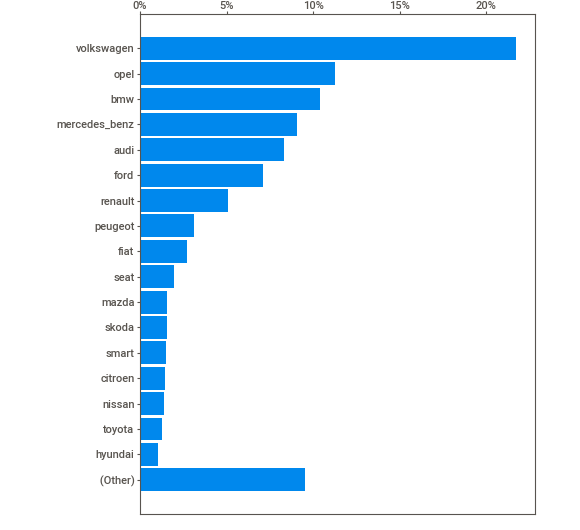
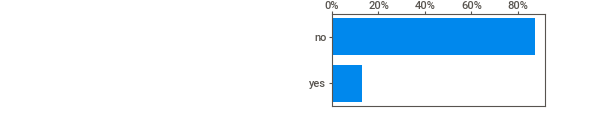
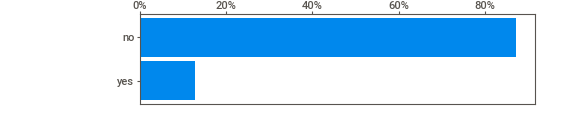
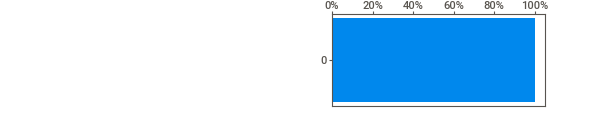
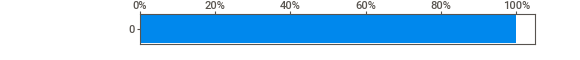
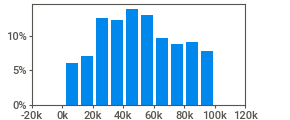
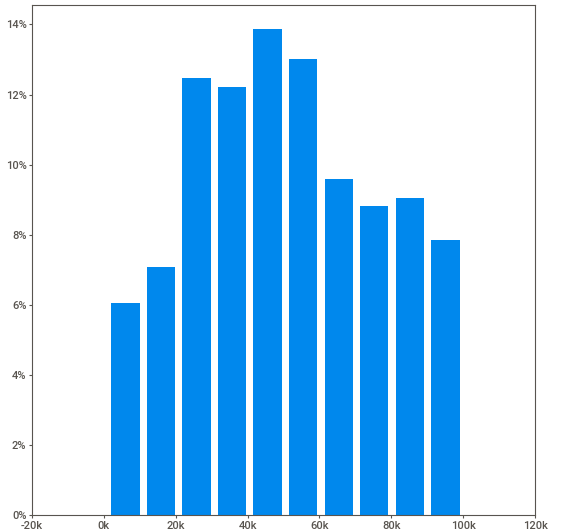
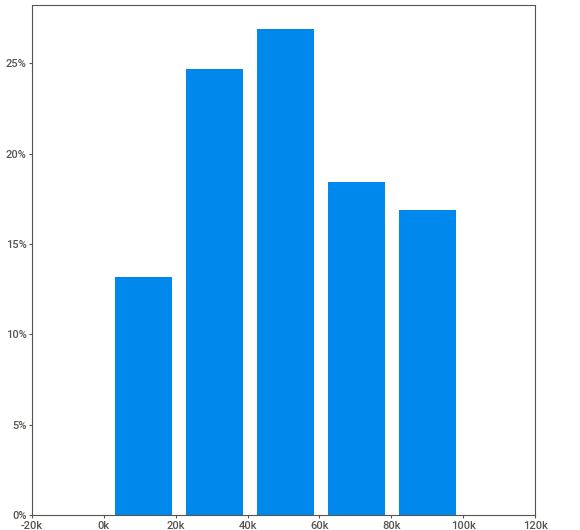
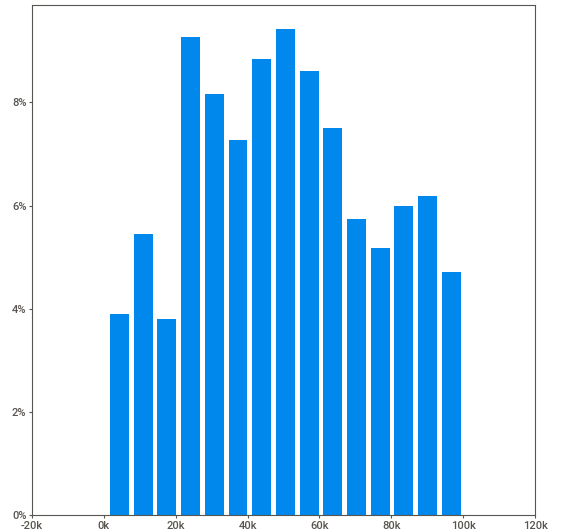
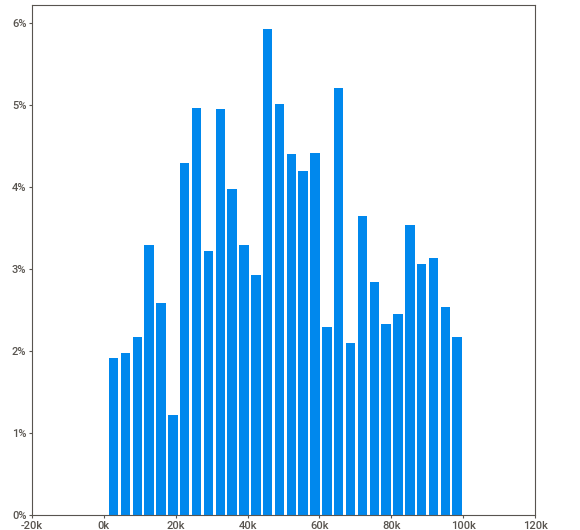
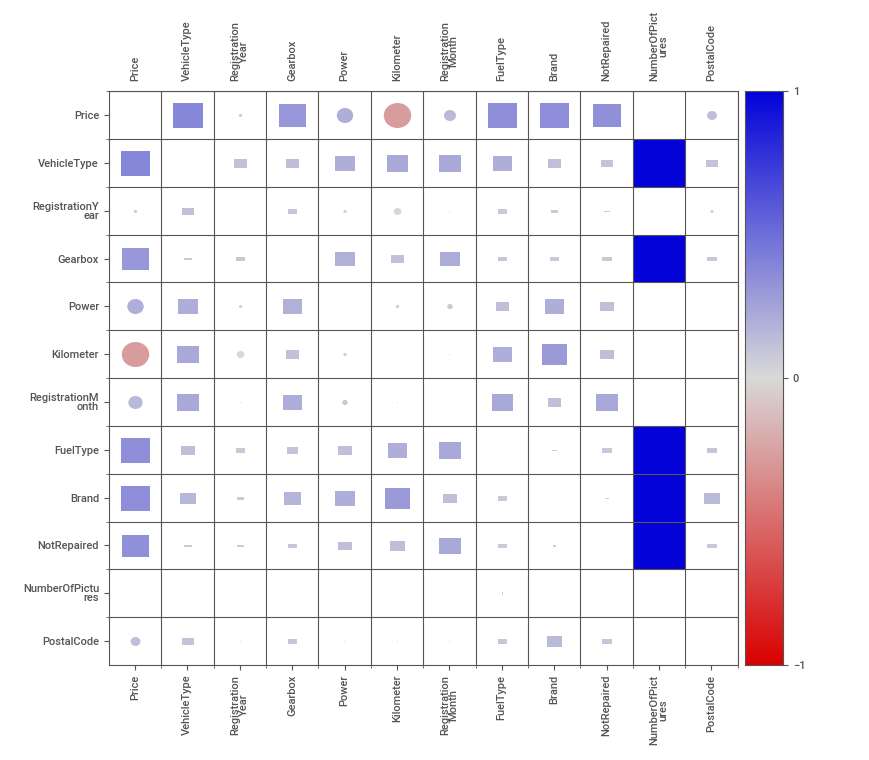
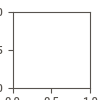

In [5]:
report = sweetviz.analyze(data)
report.show_notebook()

Когда мы нажмем на кнопку «Ассоциации» в разделе сводки, в правой части экрана появится тепловая карта корреляции. Тепловая карта содержит квадраты или круги, присутствующие на каждой плитке. Круги представляют корреляцию Пирсона в диапазоне [-1, 1]. Квадраты представляют собой категориальные ассоциации. Категориальные ассоциации идут по строкам и показывают, сколько ассоциаций имеет объект, представленный именем строки слева, со всеми другими признаками данных. Категориальные ассоциации варьируются от [0,1]. Тепловая карта будет иметь круг всякий раз, когда показывает отношение между числовыми признаками и квадратами при отображении отношения между категориальными признаками или числовыми и категориальными признаками. Диагональ диаграммы остается пустой, так как каждый объект имеет полную связь с самим собой. В нашем примере функция WineType категорична, поэтому строка и столбец, представляющие WineType, имеют квадраты, тогда как все остальные ячейки имеют круги, потому что все остальные признаки являются числовыми.

Под сводным разделом есть вкладка для каждой функции нашего набора данных. Он также имеет вкладку для целевой переменной, если мы предоставили имя столбца, которое будет рассматриваться как целевая переменная. Вкладка имеет базовую статистику о функции, такую как общие значения, недостающее количество, мин, макс, медиана, среднее, квантили, диапазон, стандартное отклонение и т. Д. Он также имеет гистограмму, показывающую распределение данных признаков. Мы можем нажать на вкладку, и она откроет еще одну вкладку с правой стороны, показывающую более подробную информацию о функции. Если мы предоставили имя целевой переменной, то вкладка для нее будет присутствовать первой, и она будет окрашена в черный цвет, чтобы отличить ее от других столбцов.

2. Анализ целевых переменных 
В рамках этого раздела мы объясним, как мы можем использовать sweetviz для выполнения анализа целевых переменных,
который может быть полезен для просмотра взаимосвязи между целевой переменной и всеми функциями набора данных. Мы можем
сделать это, просто указав имя столбца из фрейма данных, который мы хотим использовать в качестве целевой переменной в методе
analyze().

Ниже мы сгенерировали отчет из нашего фрейма данных auto с использованием метода analyze().
Мы поручили методу использовать столбец Price в качестве целевой переменной.

                                             |                                             | [  0%]   00:00 ->…


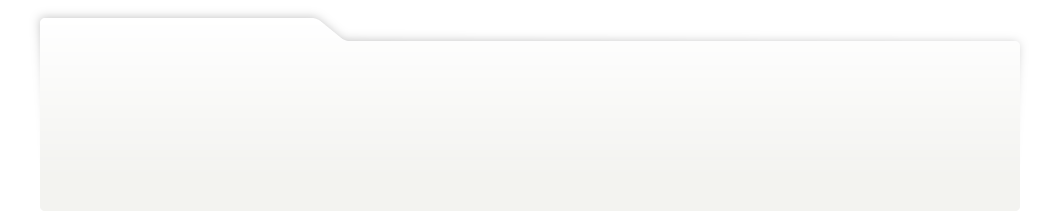
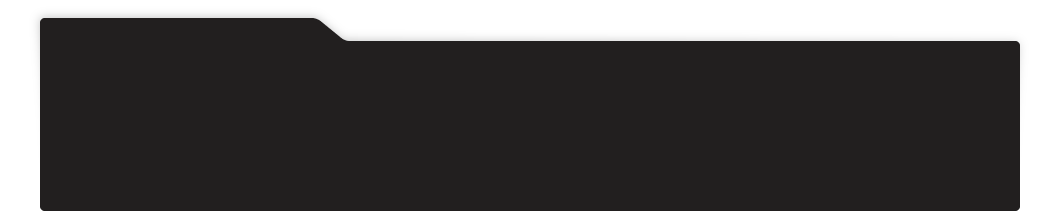
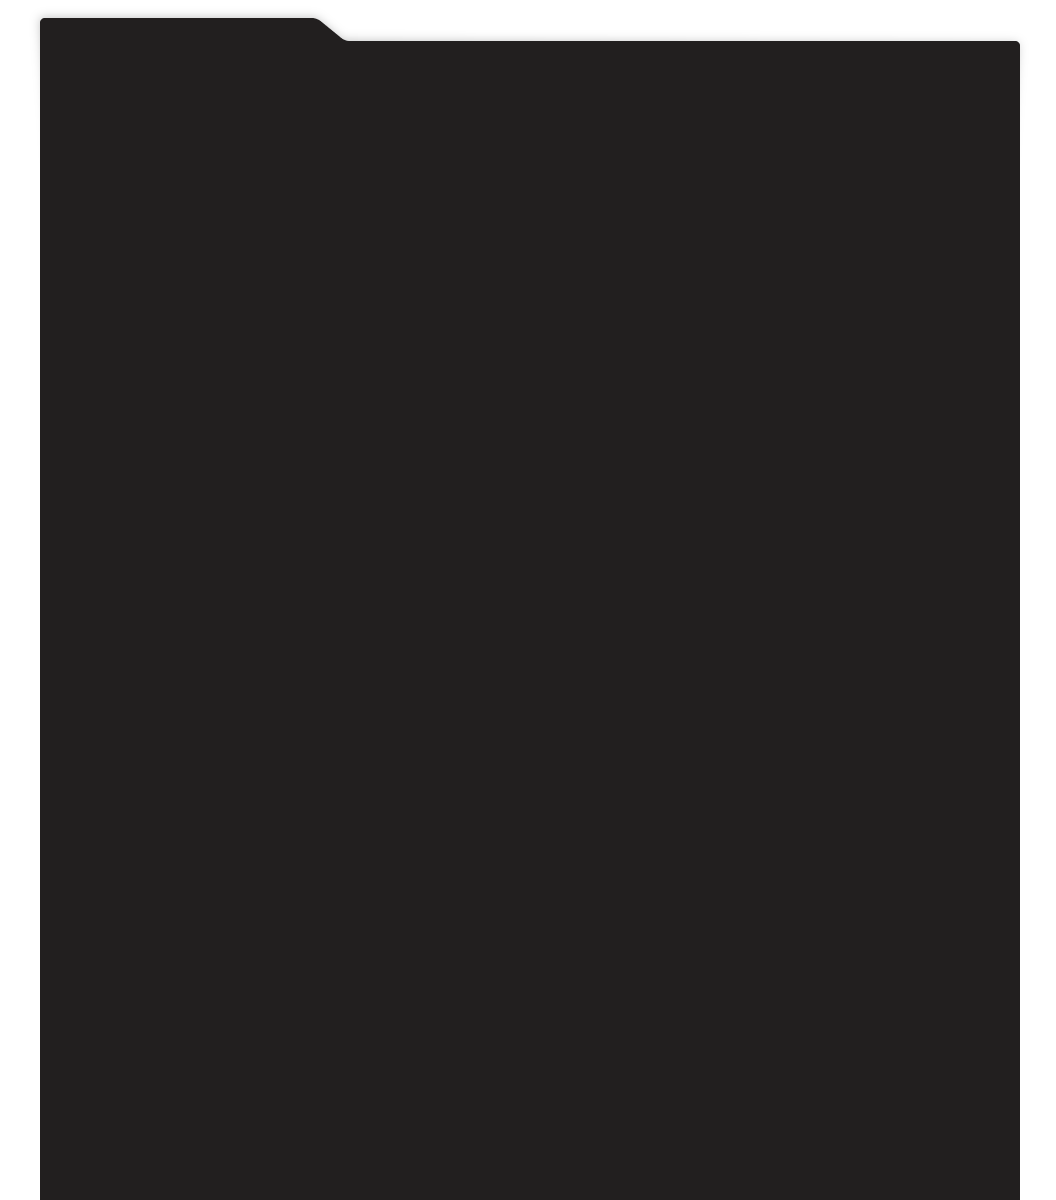
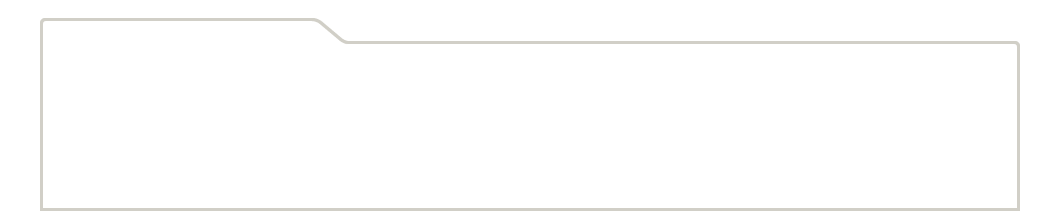
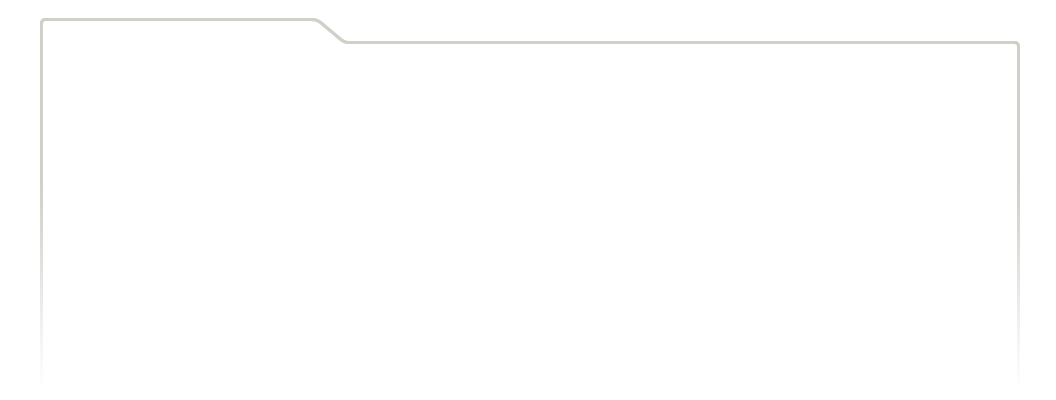
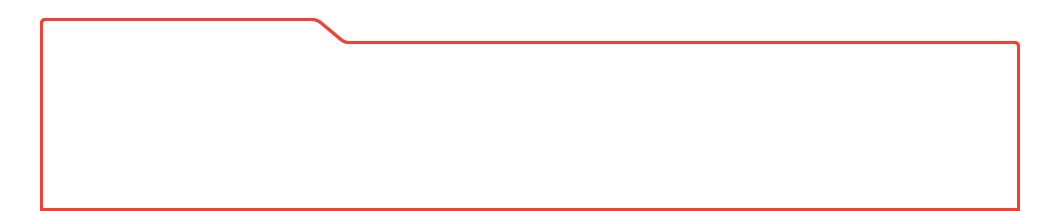
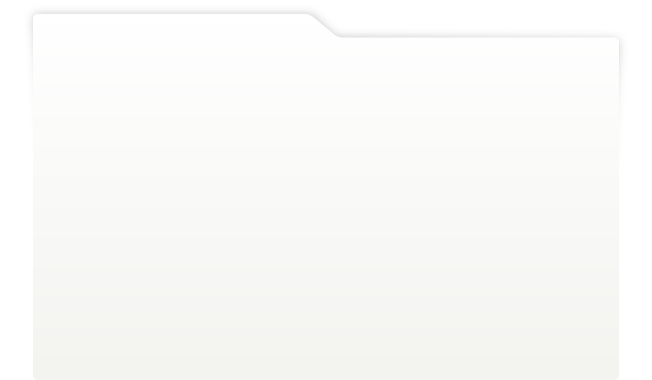
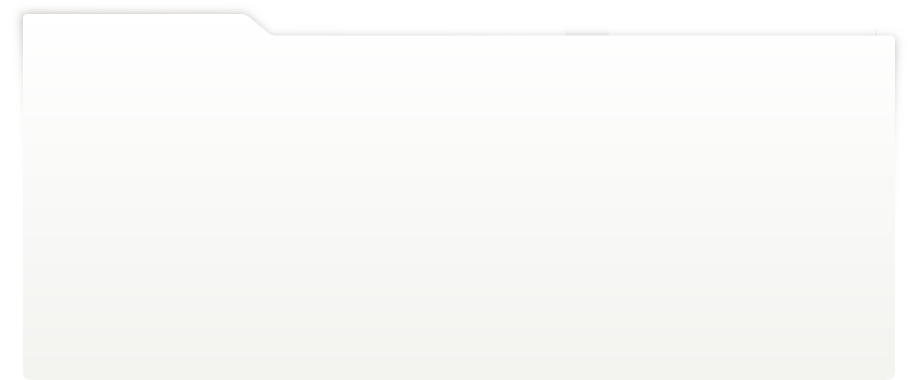
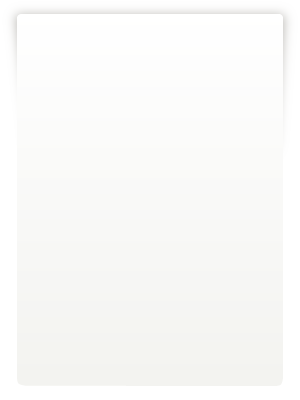
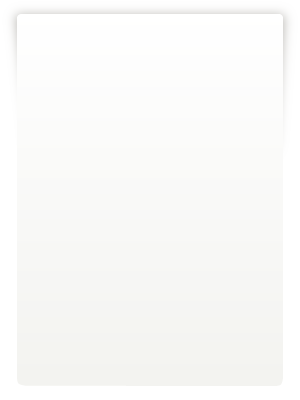
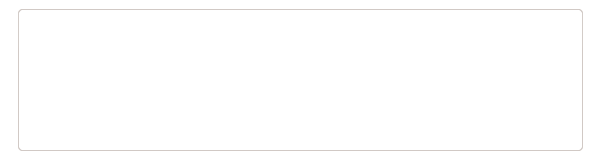
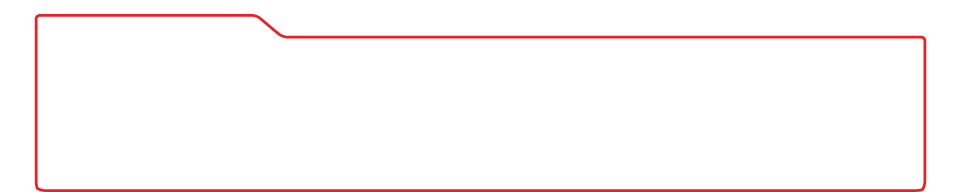
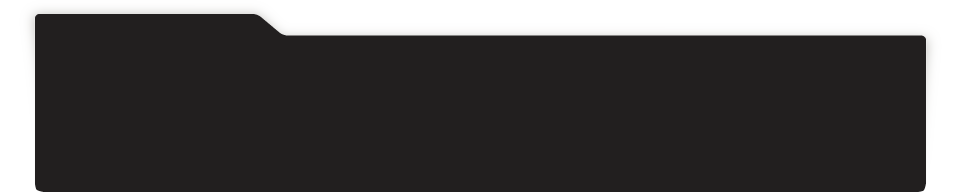
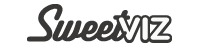
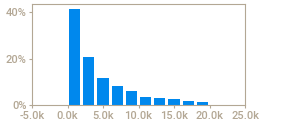
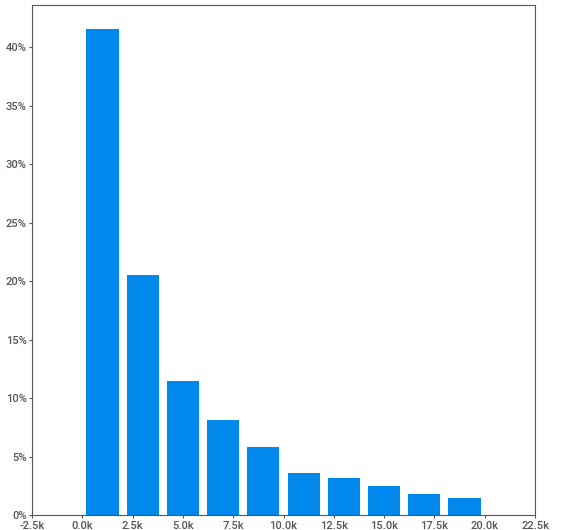
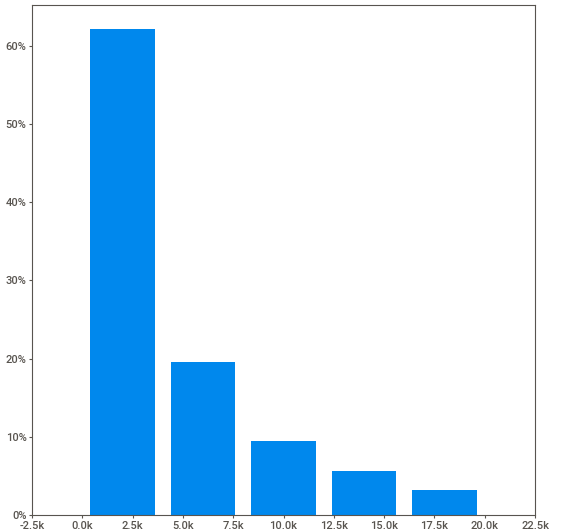
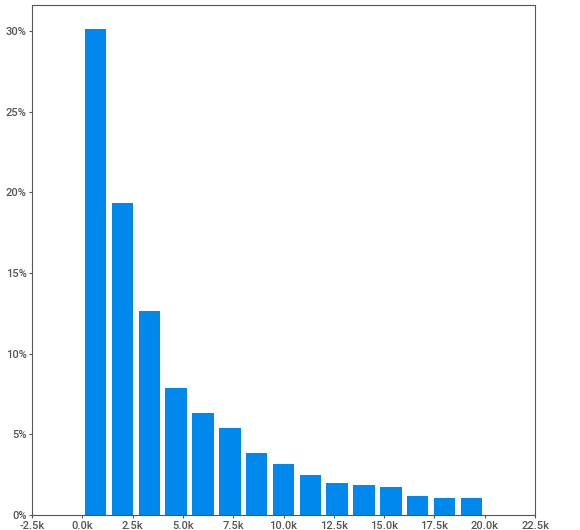
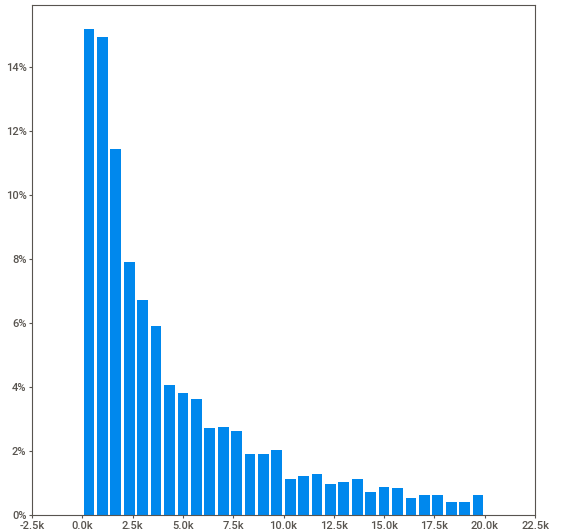
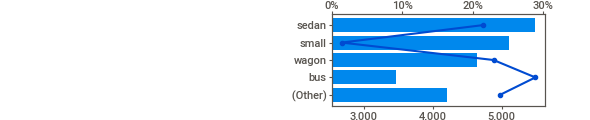
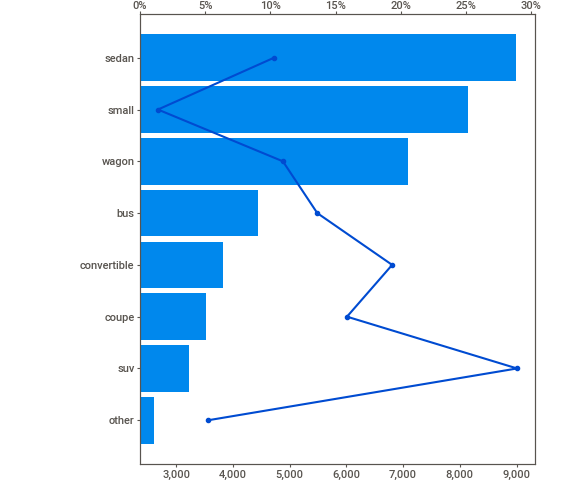
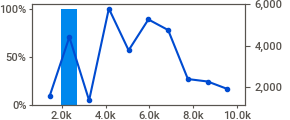
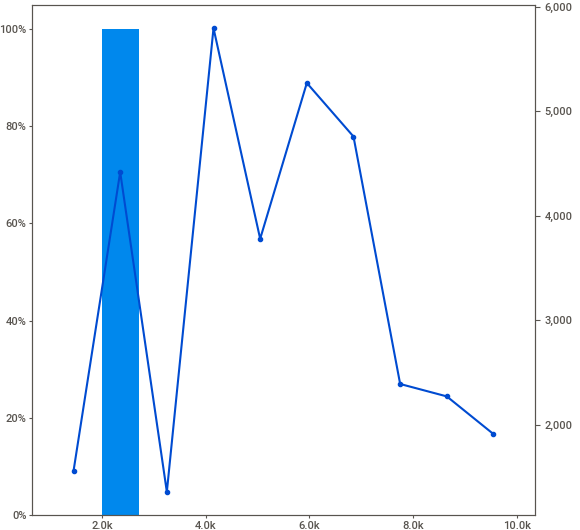
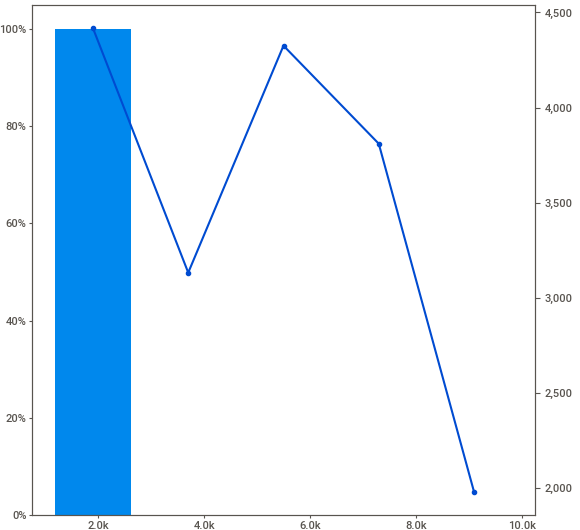
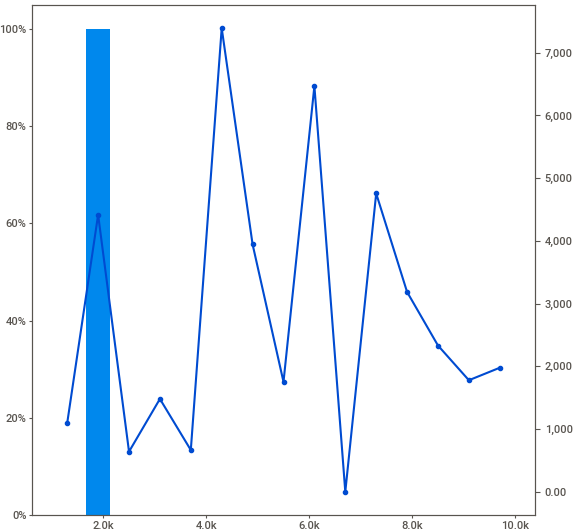
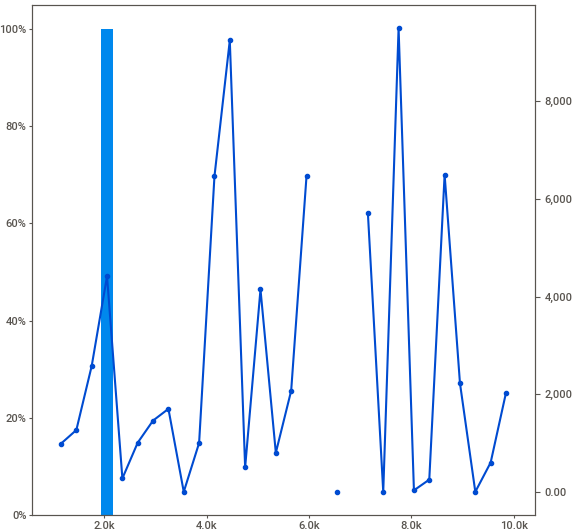
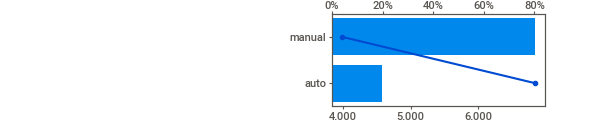
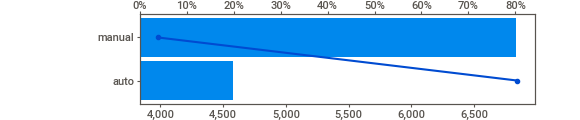
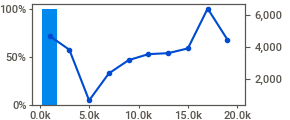
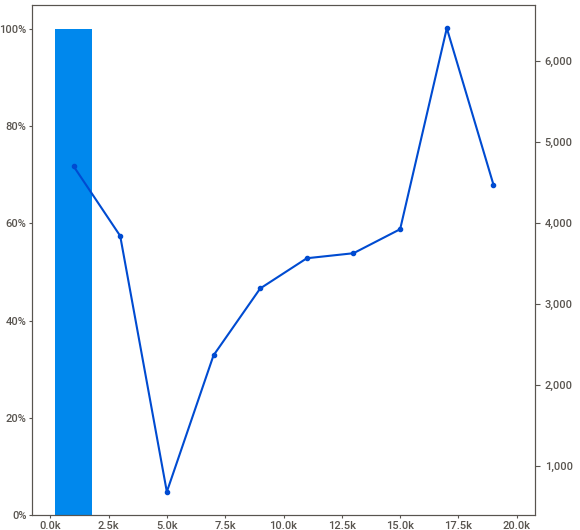
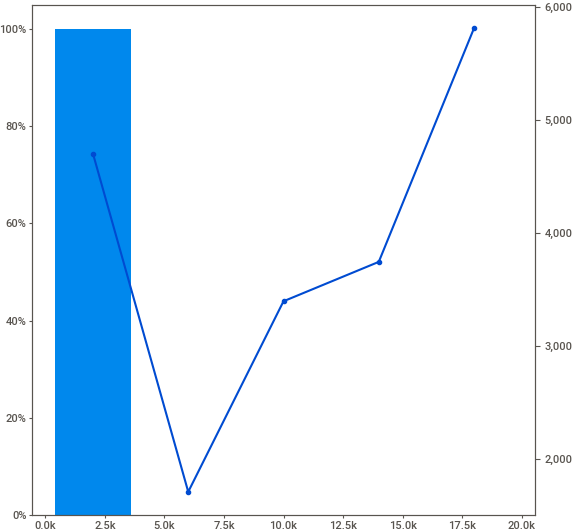
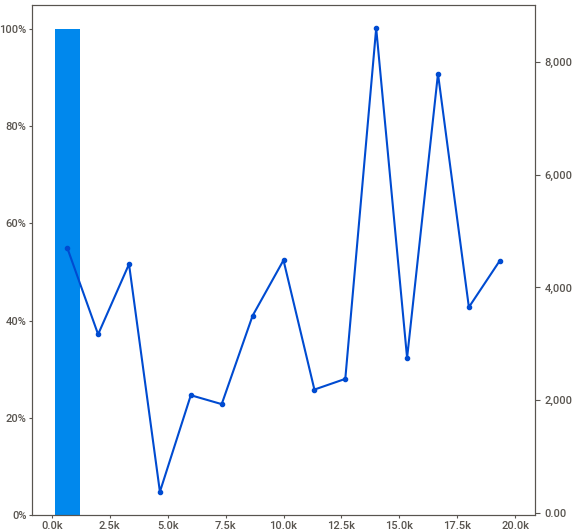
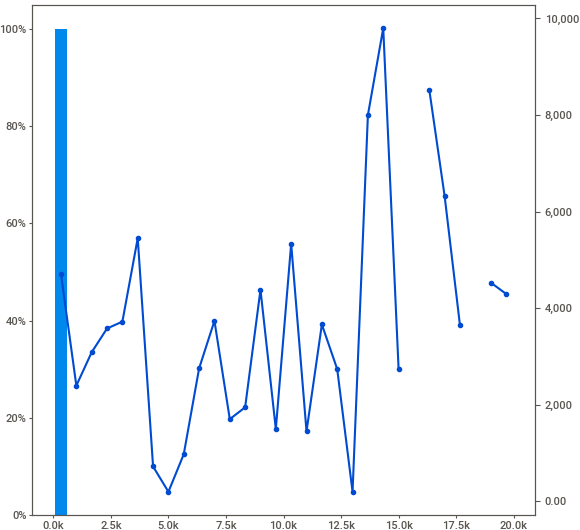
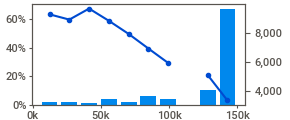
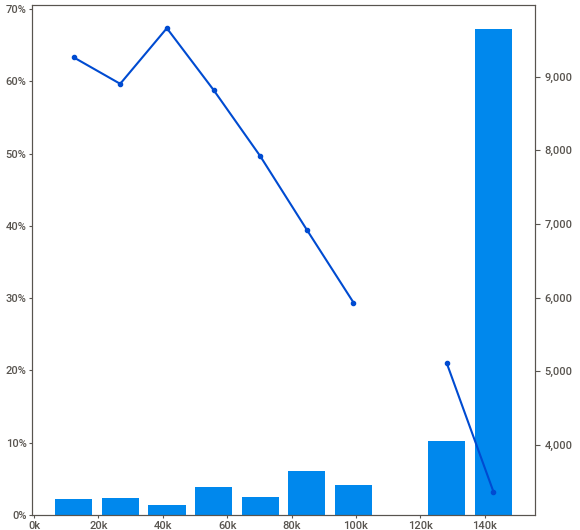
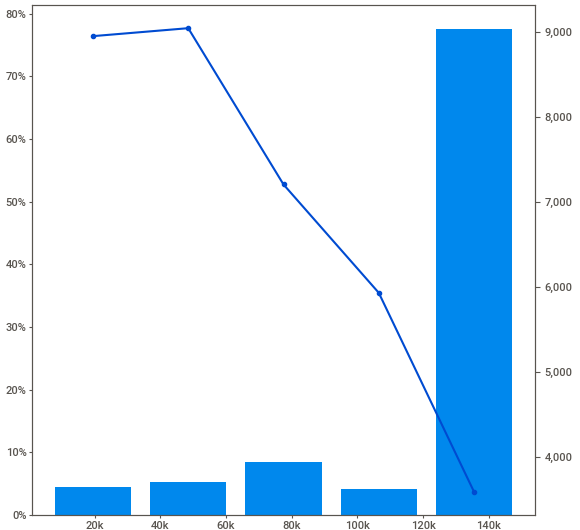
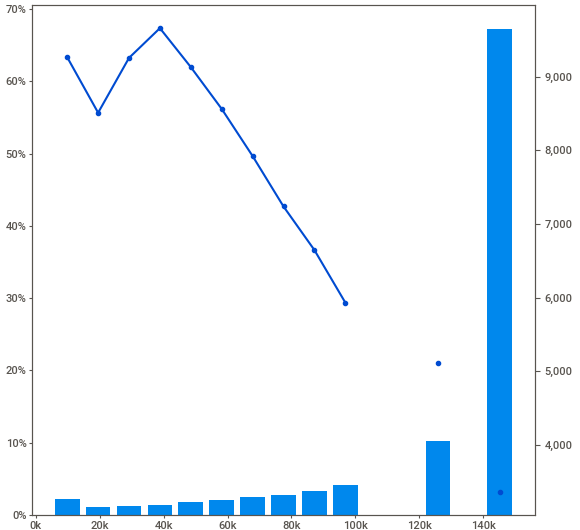
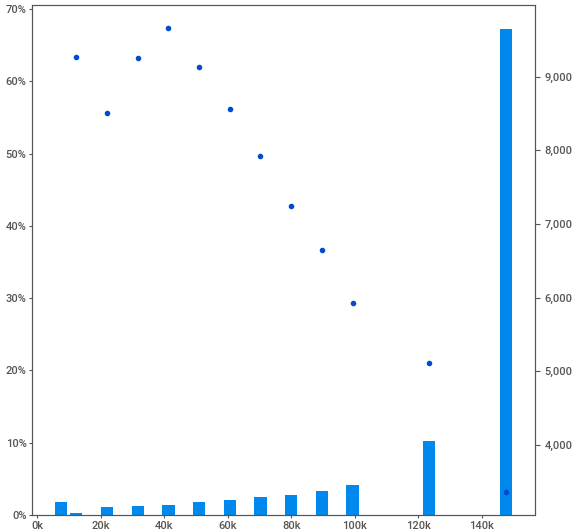
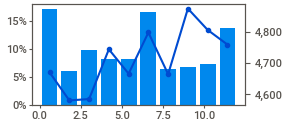
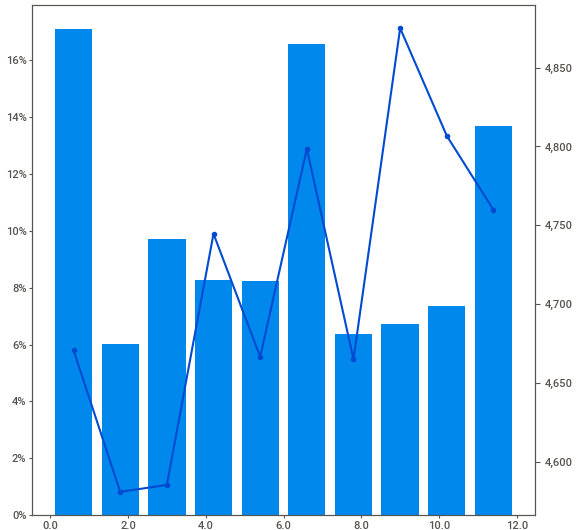
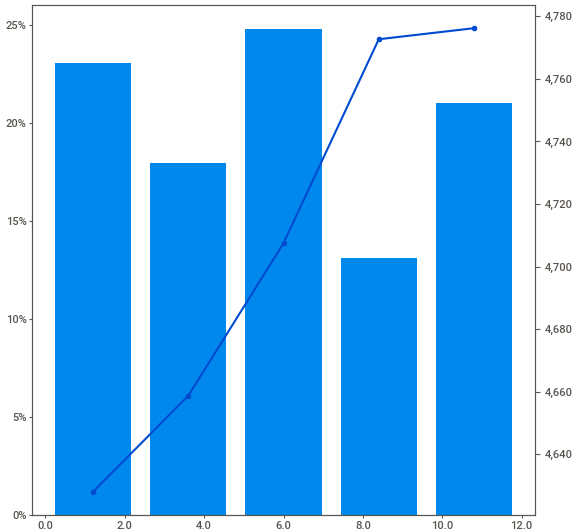
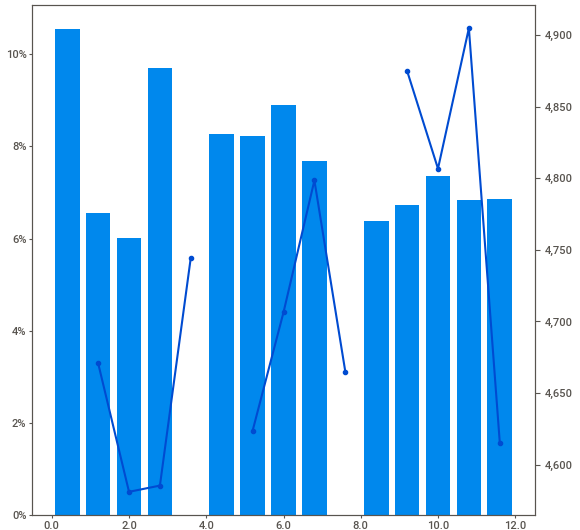
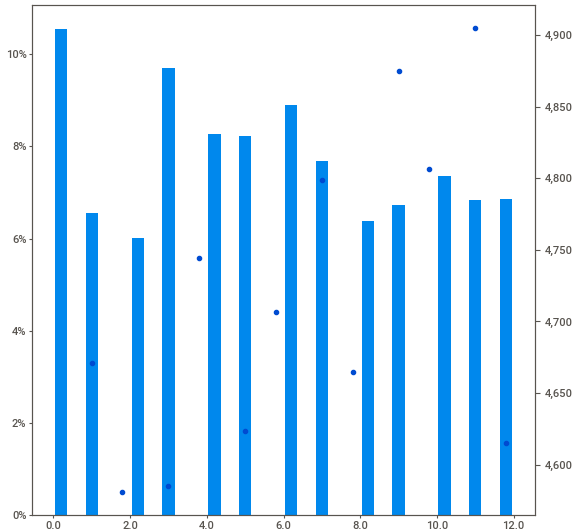
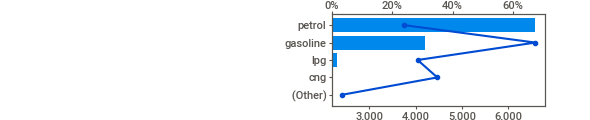
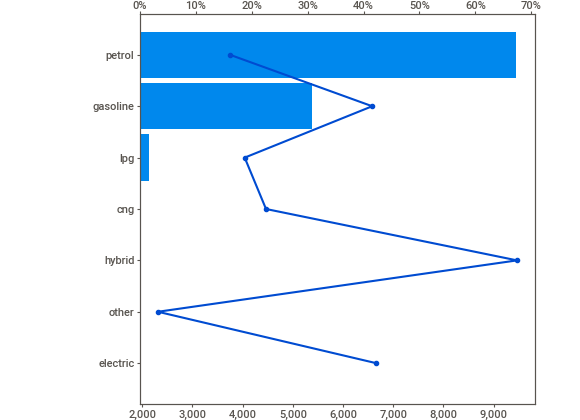
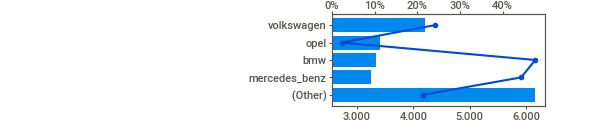
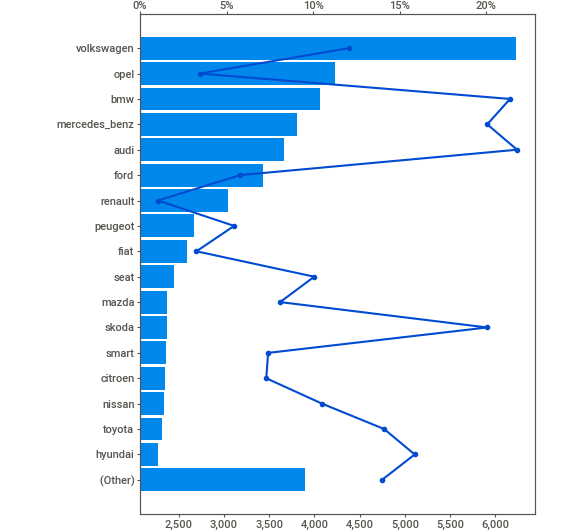
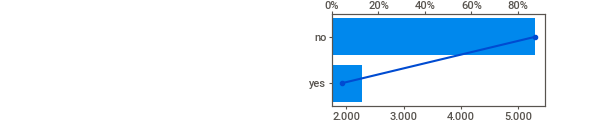
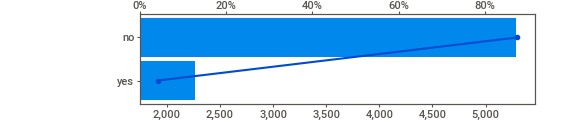
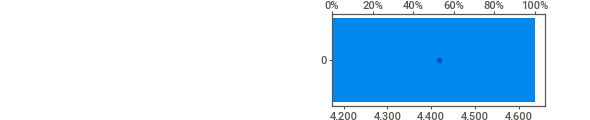
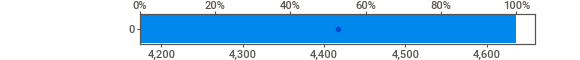
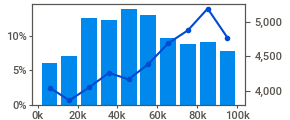
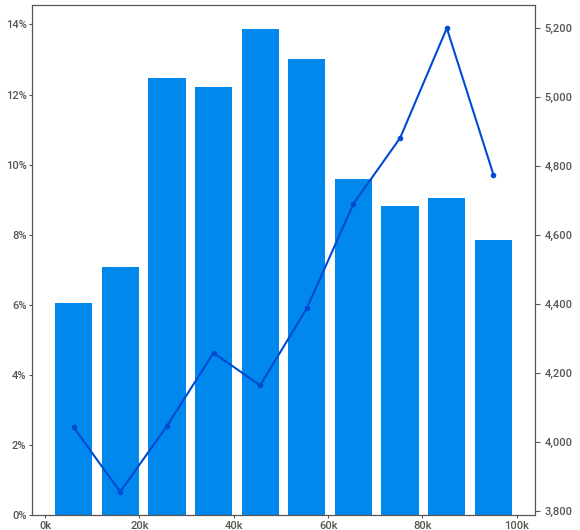
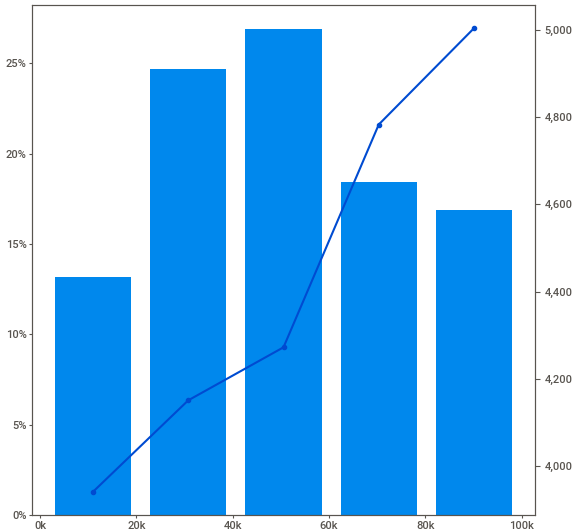
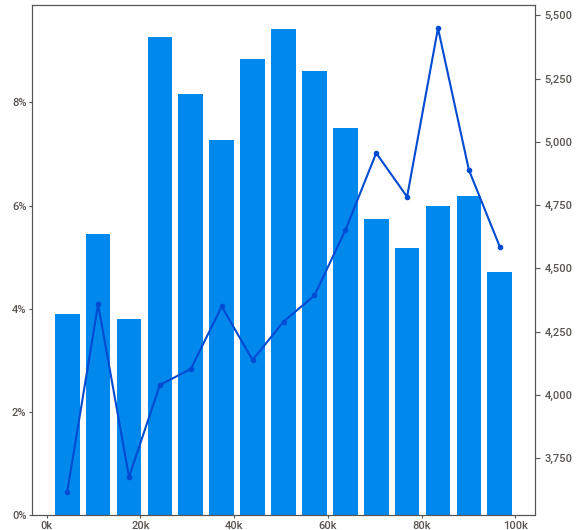
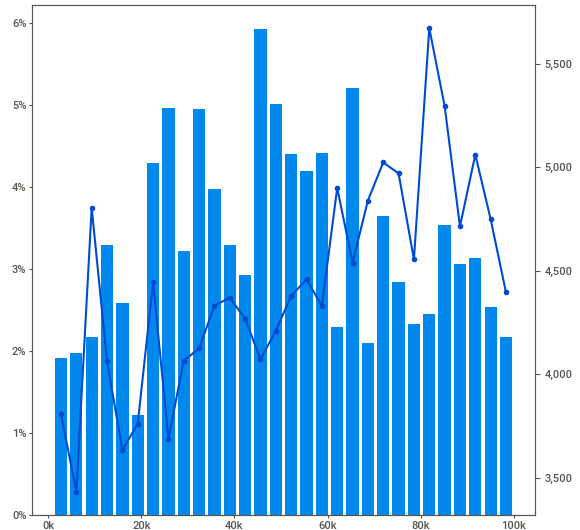
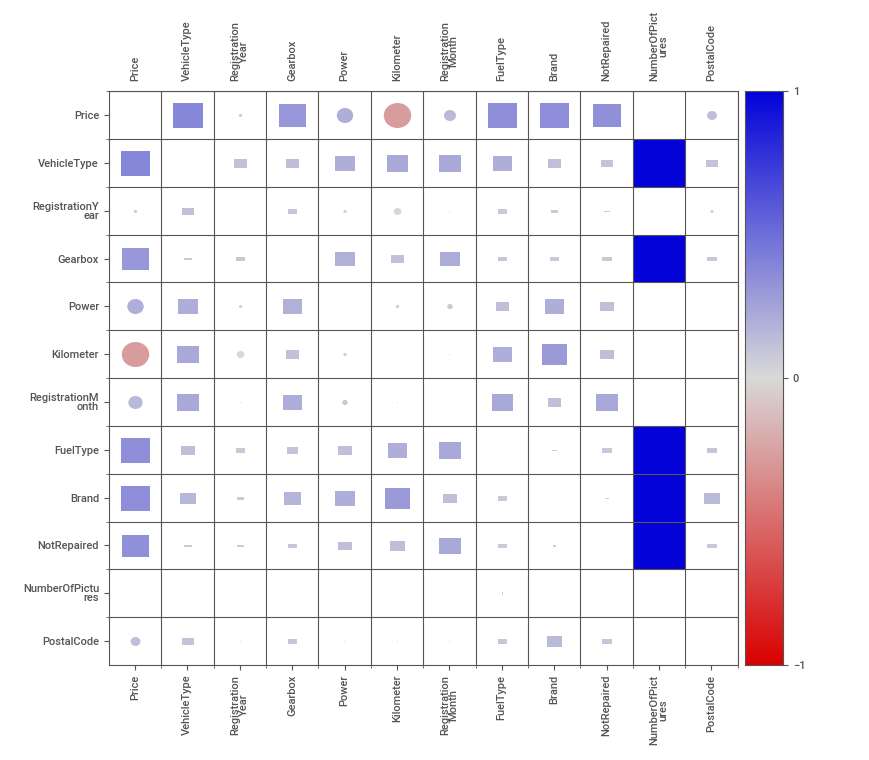
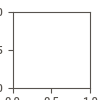

In [6]:
report = sweetviz.analyze([data, "AUTOS"], target_feat="Price")
report.show_notebook()

                                             |                                             | [  0%]   00:00 ->…


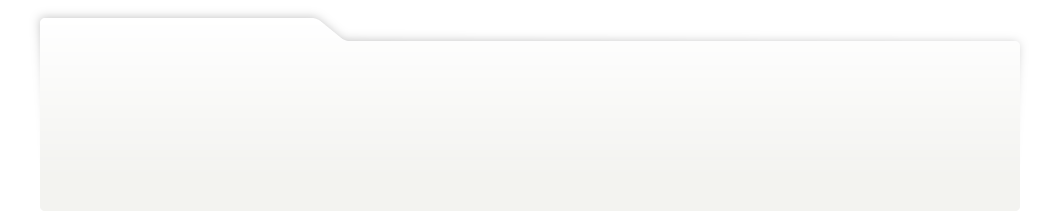
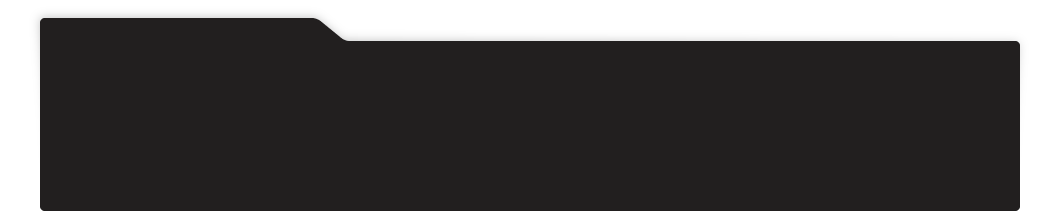
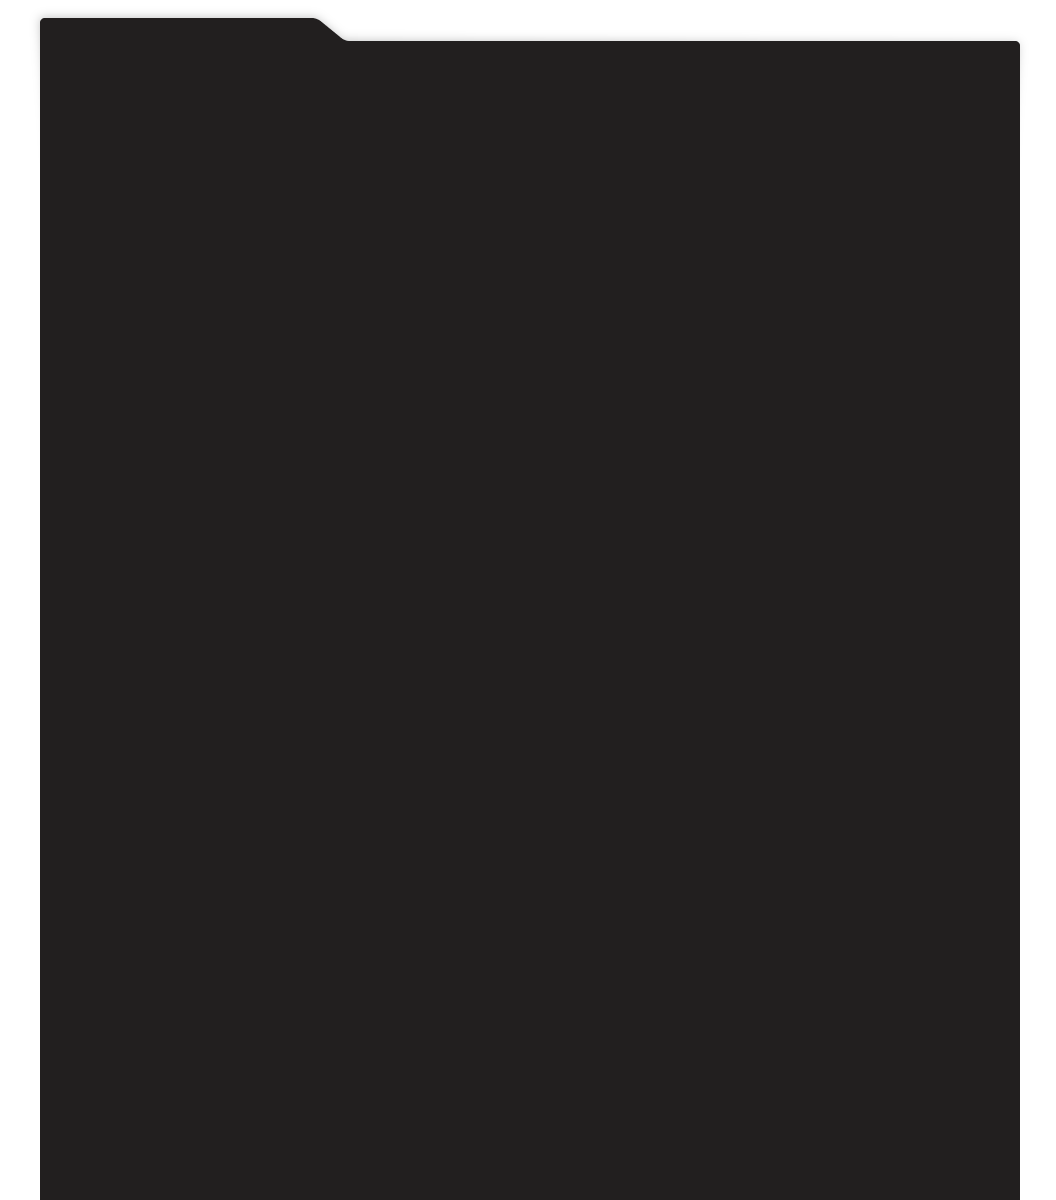
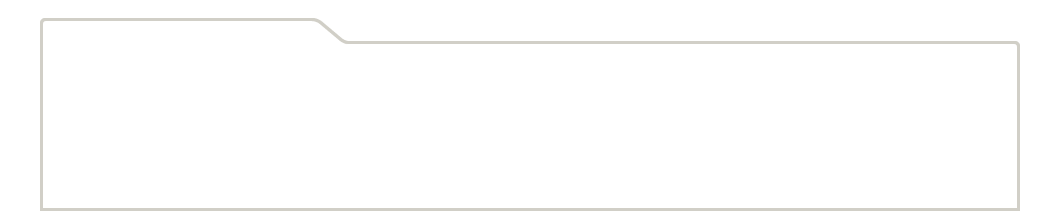
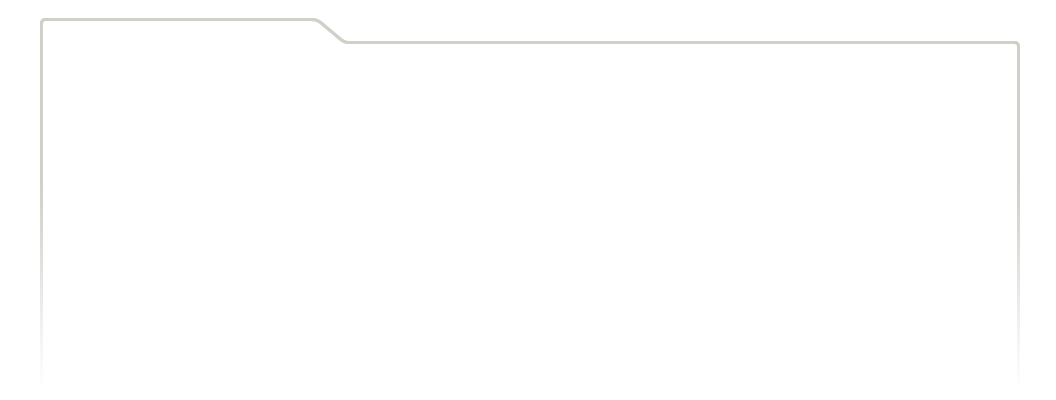
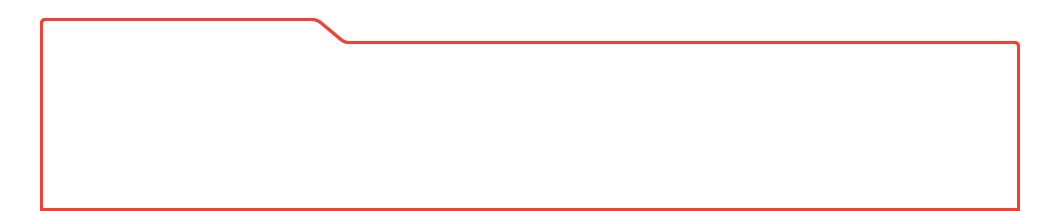
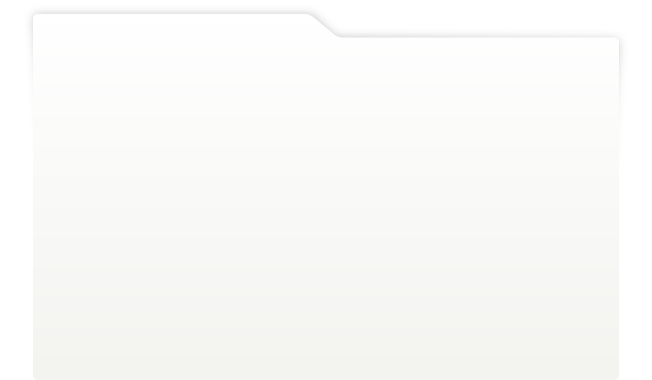
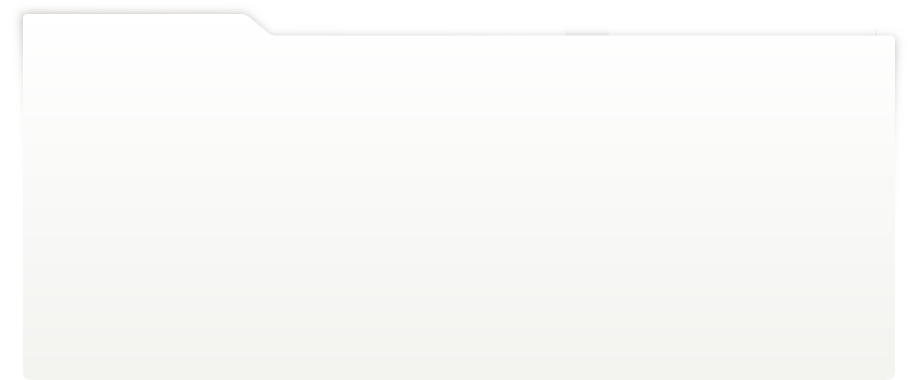
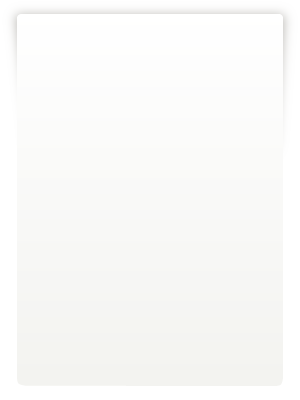
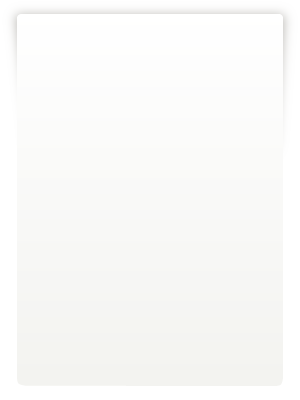
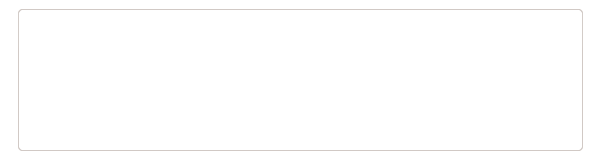
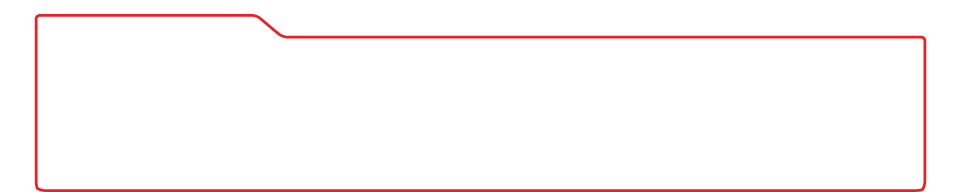
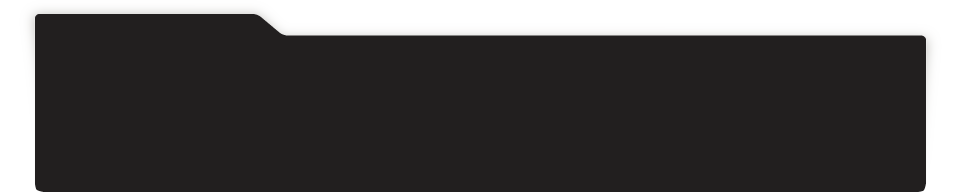
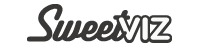
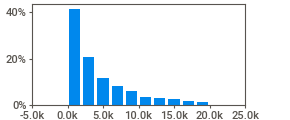
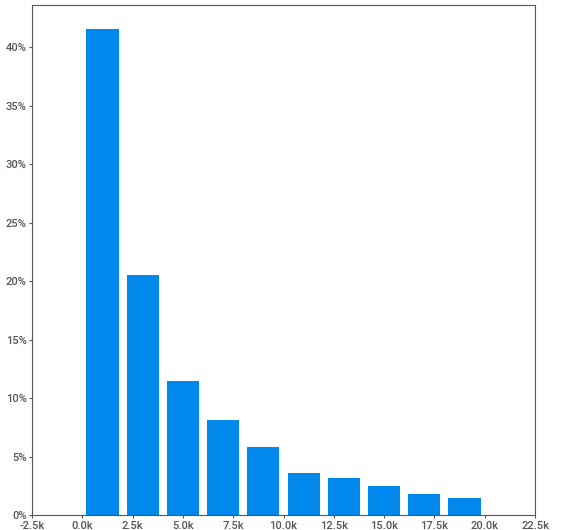
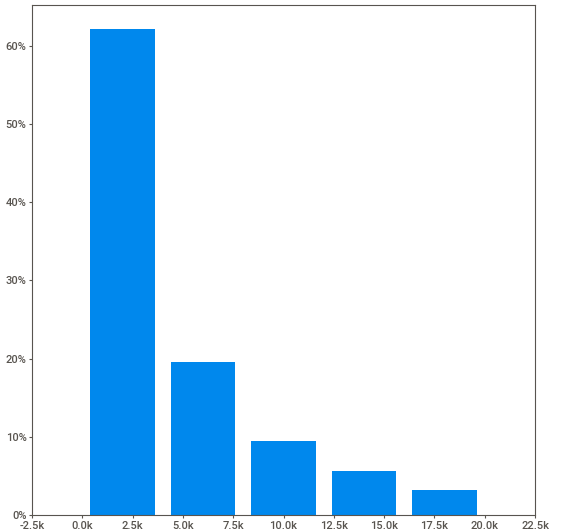
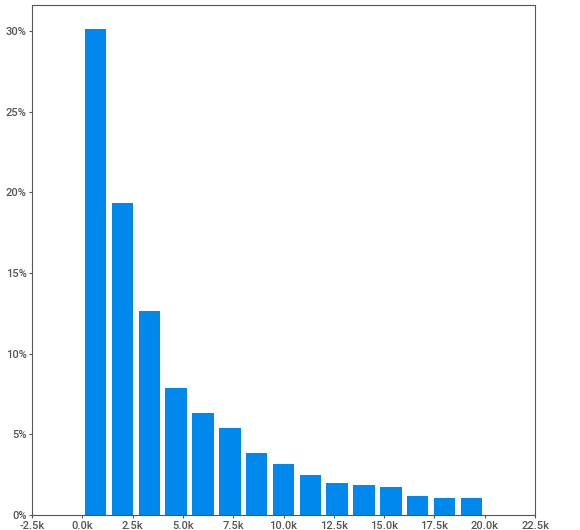
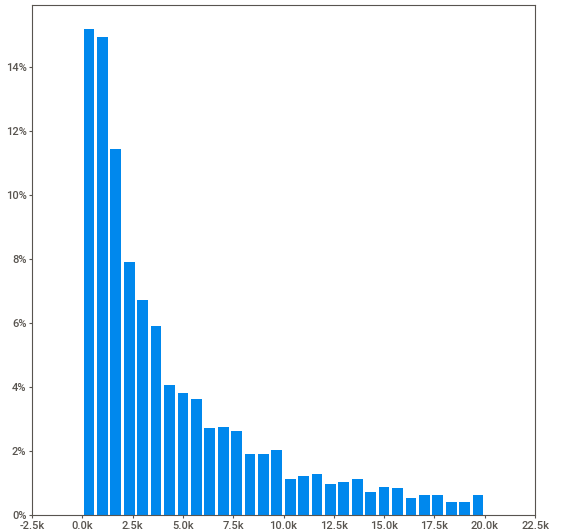
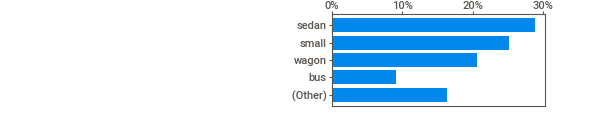
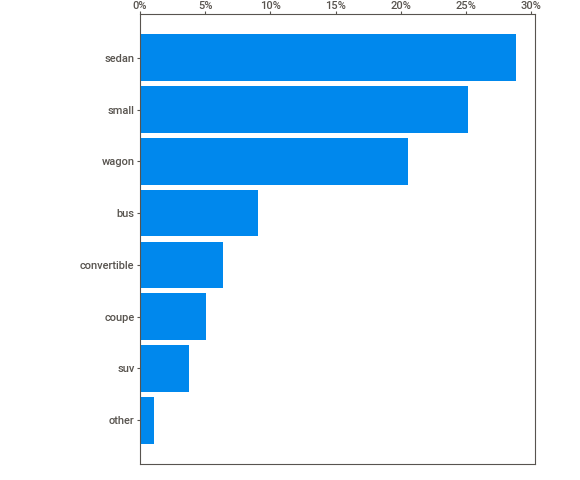
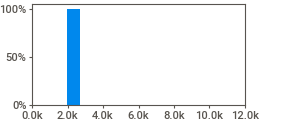
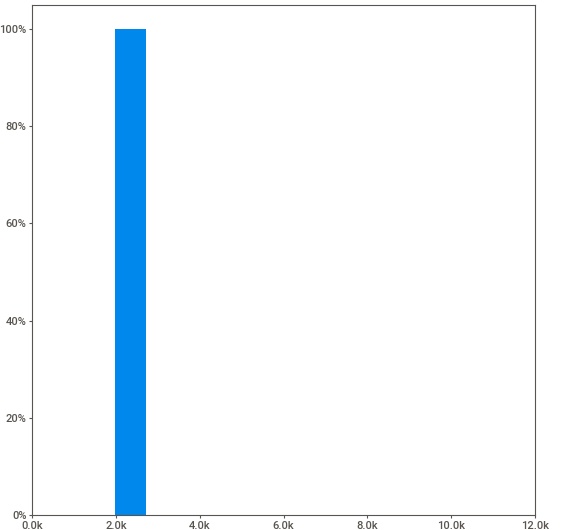
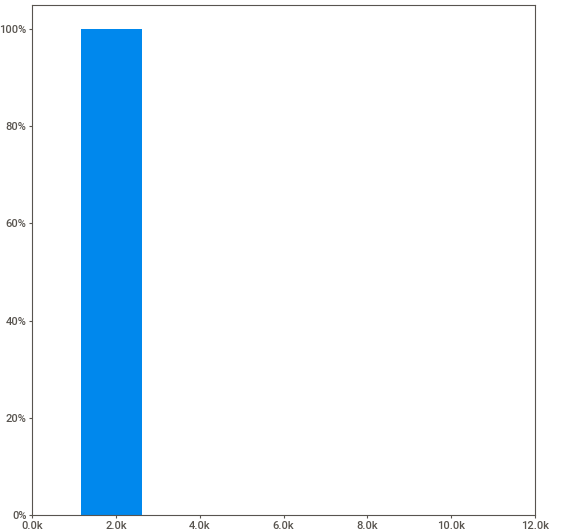
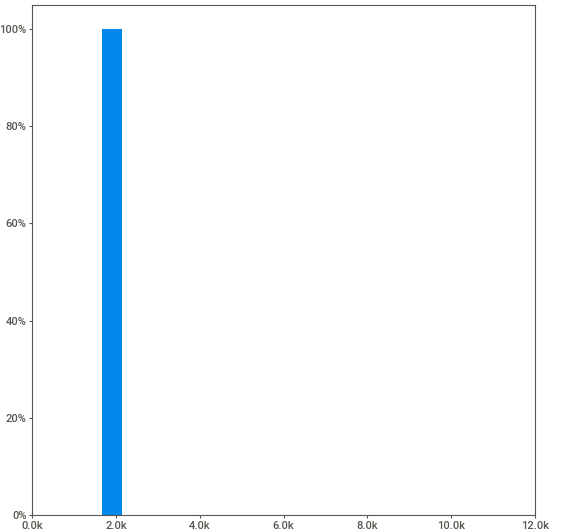
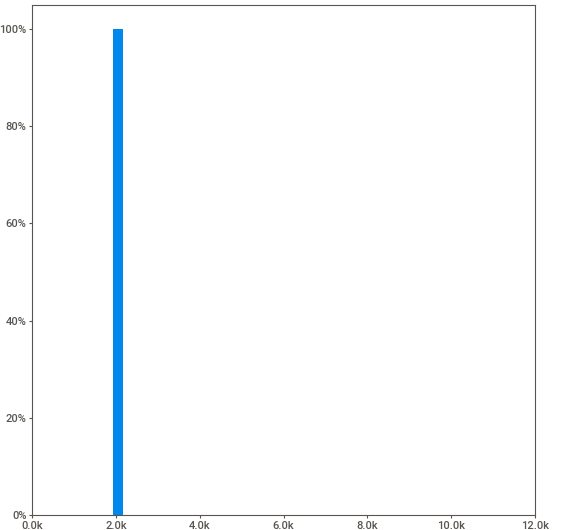
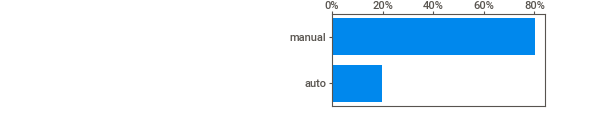
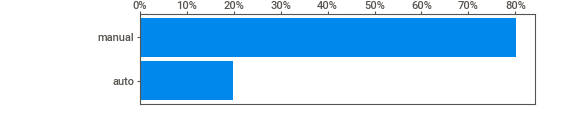
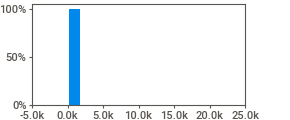
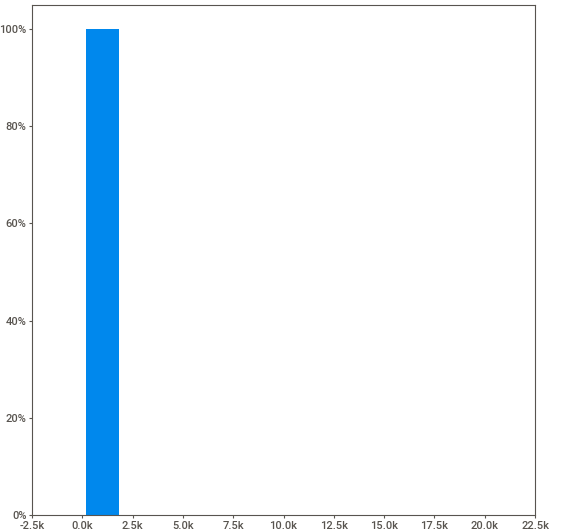
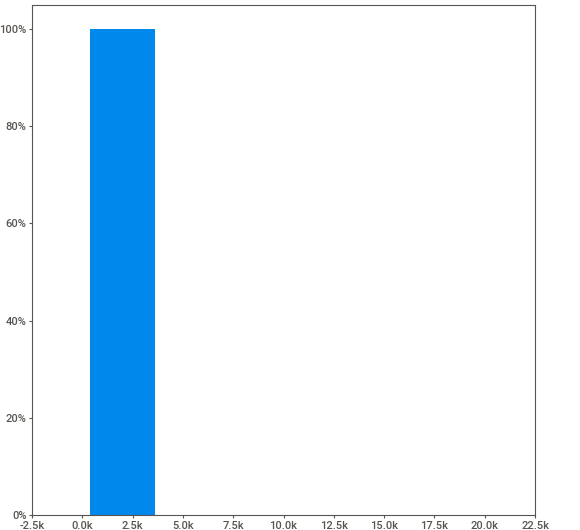
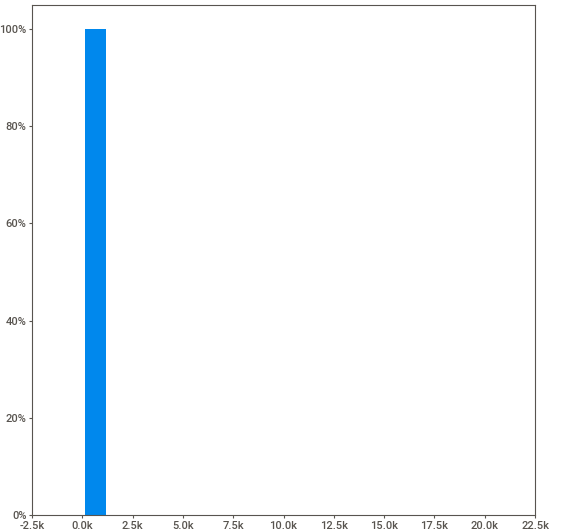
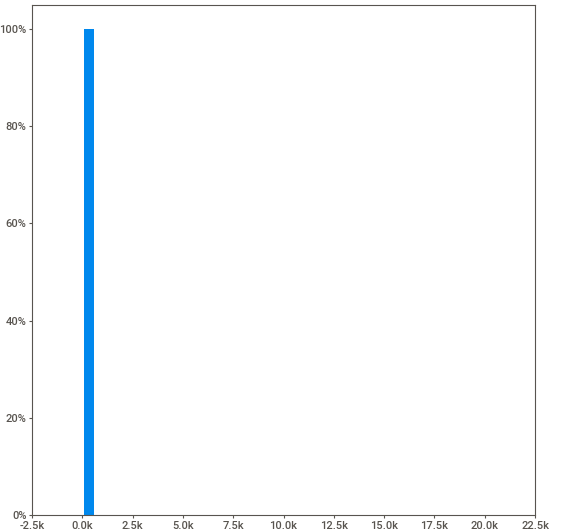
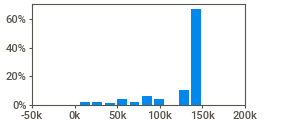
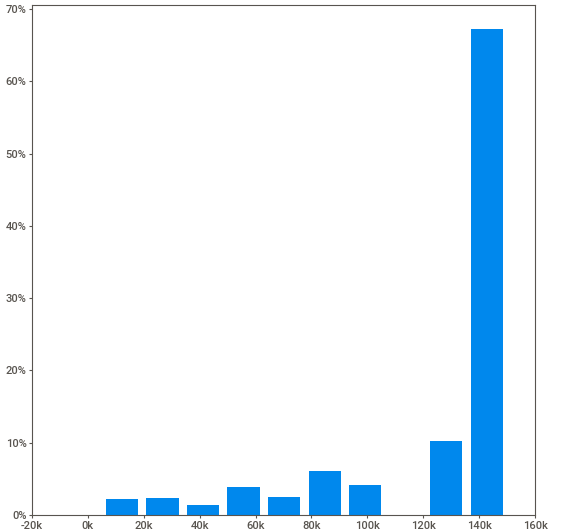
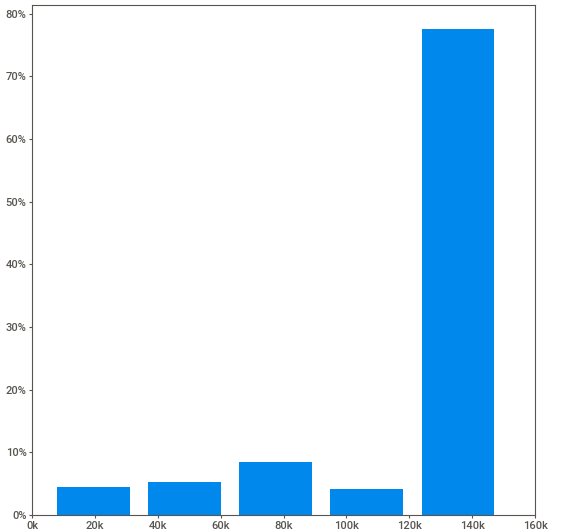
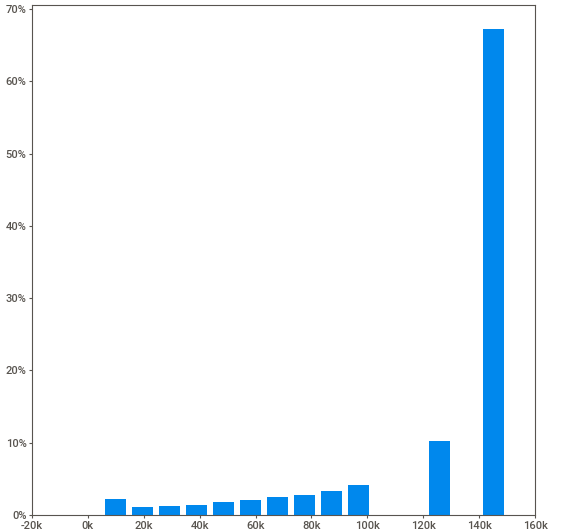
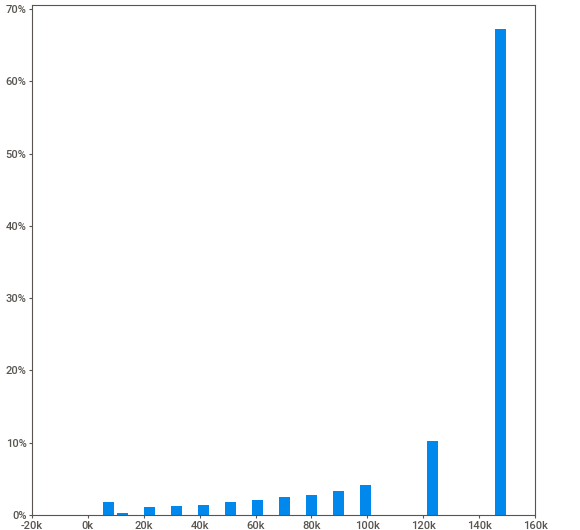
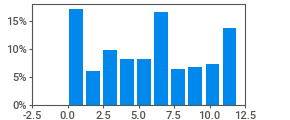
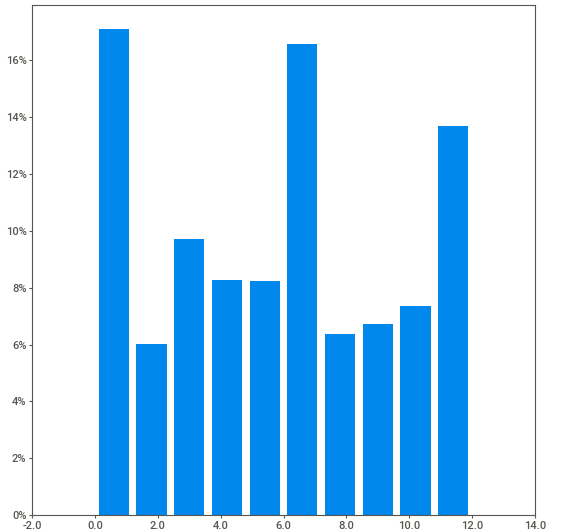
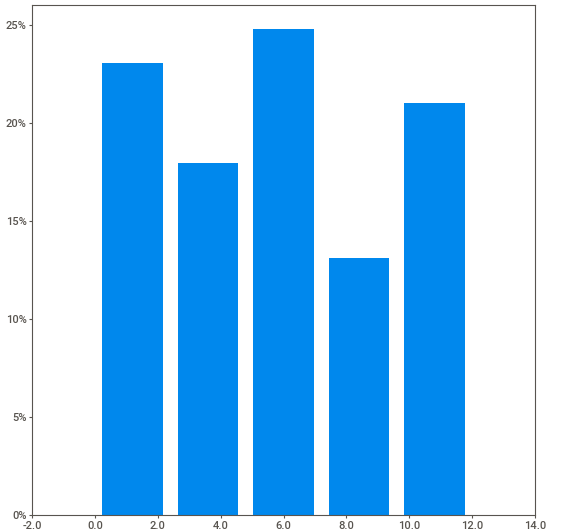
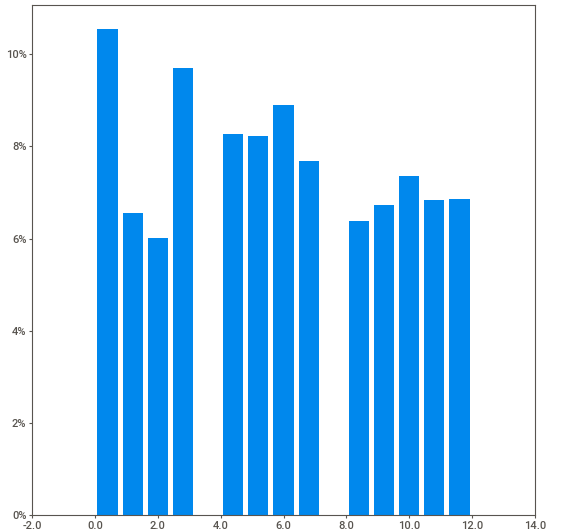
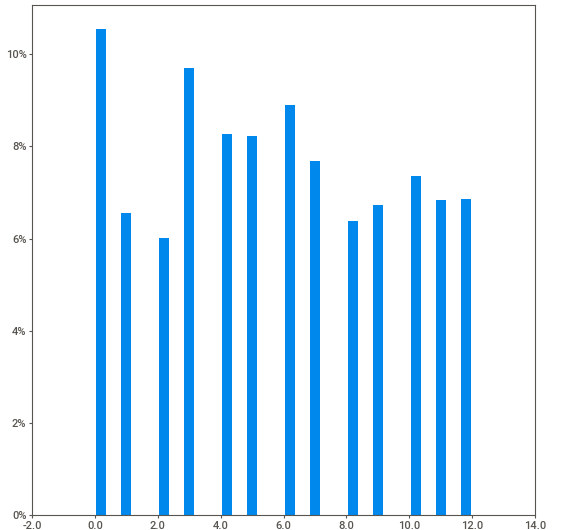
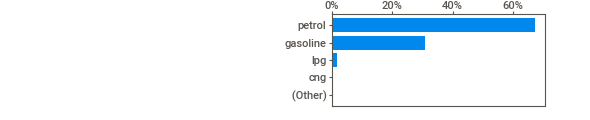
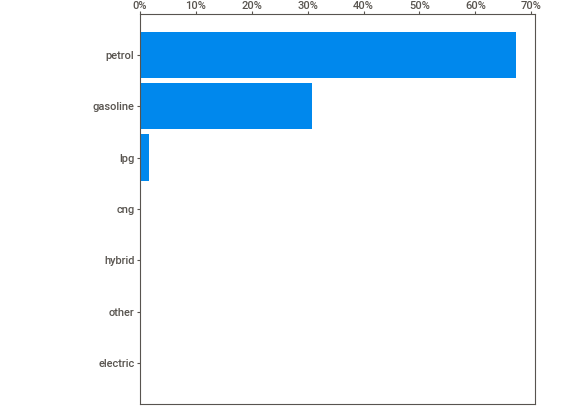
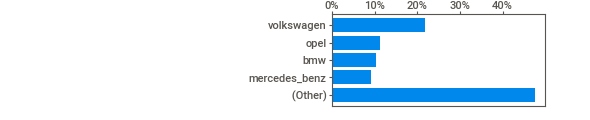
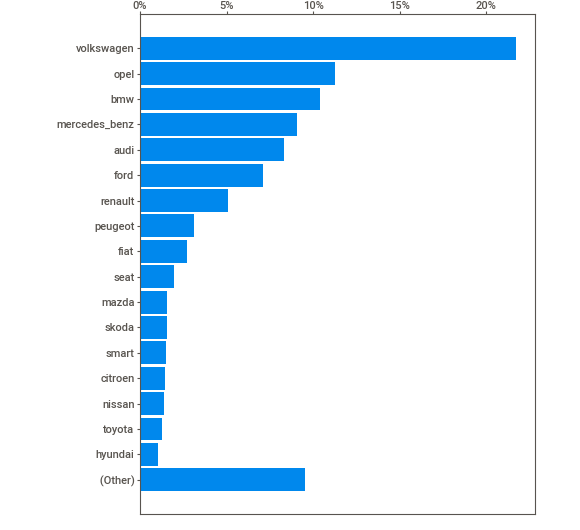
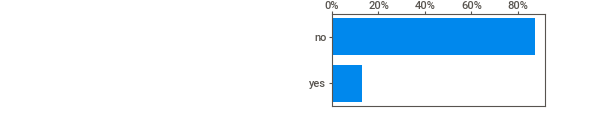
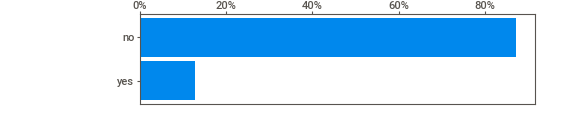
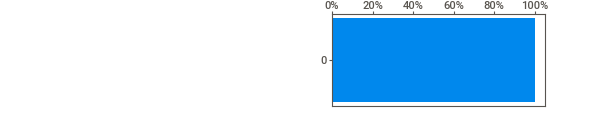
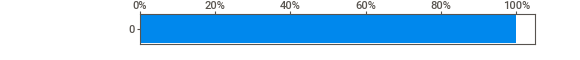
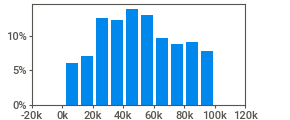
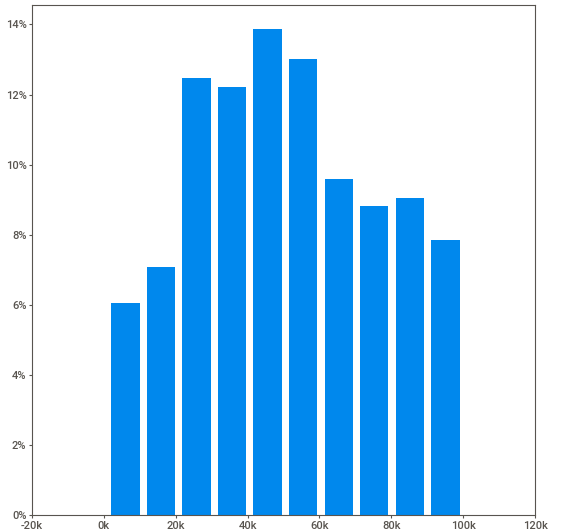
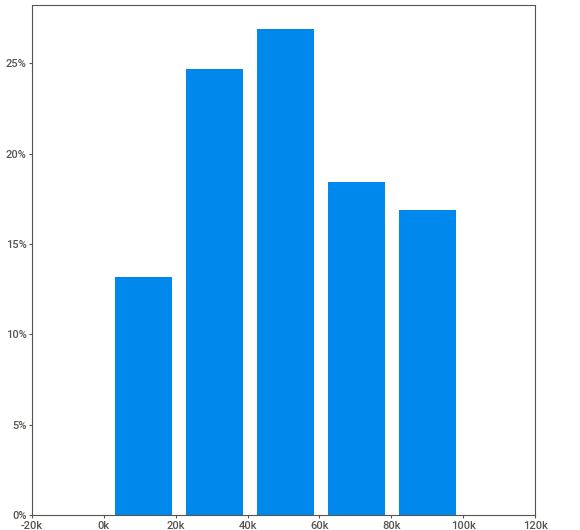
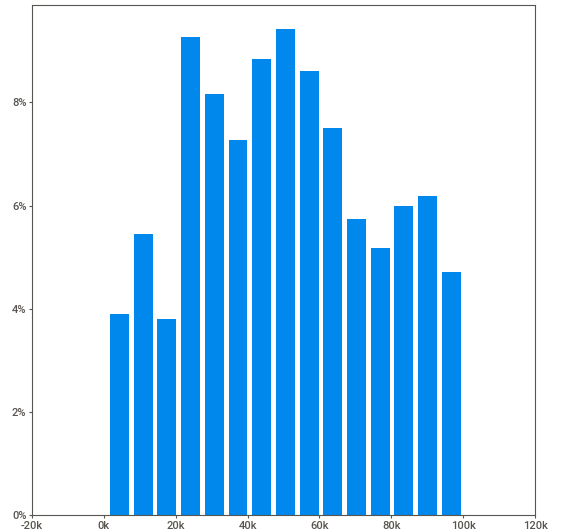
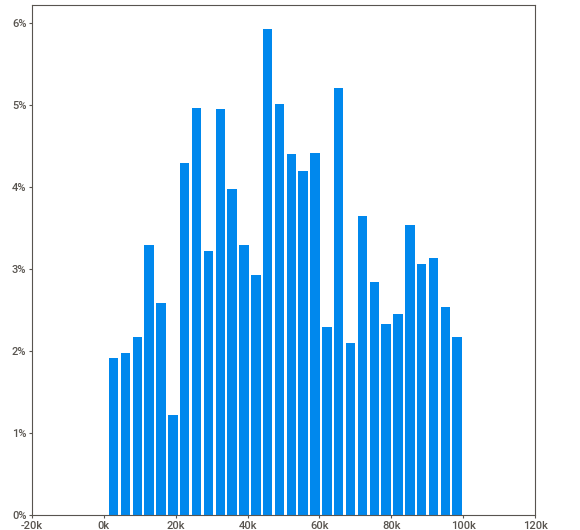

In [7]:
report = sweetviz.analyze(source=data, pairwise_analysis="off")
report.show_notebook()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [9]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [10]:
#   посмотрим на статистику
display(data.describe())
data.shape

Price  RegistrationYear      Power  Kilometer  RegistrationMonth  \
count 354369.000        354369.000 354369.000 354369.000         354369.000   
mean    4416.657          2004.234    110.094 128211.173              5.715   
std     4514.159            90.228    189.850  37905.342              3.726   
min        0.000          1000.000      0.000   5000.000              0.000   
25%     1050.000          1999.000     69.000 125000.000              3.000   
50%     2700.000          2003.000    105.000 150000.000              6.000   
75%     6400.000          2008.000    143.000 150000.000              9.000   
max    20000.000          9999.000  20000.000 150000.000             12.000   

       NumberOfPictures  PostalCode  
count        354369.000  354369.000  
mean              0.000   50508.689  
std               0.000   25783.096  
min               0.000    1067.000  
25%               0.000   30165.000  
50%               0.000   49413.000  
75%               0.000   71083.000  
max               0.000   99998.000

(354369, 16)

На первый взгляд можно выделить следующее:

В данных присутствуют пропуски.
В цене,мощности,месяце регистрации есть значительные аномалии.
Есть столбцы не несущие целевой информации(их будем удалять).
Есть 9 object признаков данных и 7 int64.
Проблемы в столбце с годом и месяцем регистрации автомобиля.

Удалим столбцы,которые ничего не определяют в решении задачи проекта:

DateCrawled — дата скачивания анкеты из базы DateCreated — дата создания анкеты NumberOfPictures — количество фотографий автомобиля PostalCode — почтовый индекс владельца анкеты (пользователя) LastSeen — дата последней активности пользователя
Также удалим столбец с месяцем регистрации авто

In [11]:
col_droping = ['DateCrawled','DateCreated', 'PostalCode', 'LastSeen','RegistrationMonth','NumberOfPictures']
data = data.drop(col_droping, axis=1)
print(data.shape)
data.head()

(354369, 10)


Price VehicleType  RegistrationYear Gearbox  Power  Model  Kilometer  \
0    480         NaN              1993  manual      0   golf     150000   
1  18300       coupe              2011  manual    190    NaN     125000   
2   9800         suv              2004    auto    163  grand     125000   
3   1500       small              2001  manual     75   golf     150000   
4   3600       small              2008  manual     69  fabia      90000   

   FuelType       Brand NotRepaired  
0    petrol  volkswagen         NaN  
1  gasoline        audi         yes  
2  gasoline        jeep         NaN  
3    petrol  volkswagen          no  
4  gasoline       skoda          no

In [12]:
data.describe()

Price  RegistrationYear      Power  Kilometer
count 354369.000        354369.000 354369.000 354369.000
mean    4416.657          2004.234    110.094 128211.173
std     4514.159            90.228    189.850  37905.342
min        0.000          1000.000      0.000   5000.000
25%     1050.000          1999.000     69.000 125000.000
50%     2700.000          2003.000    105.000 150000.000
75%     6400.000          2008.000    143.000 150000.000
max    20000.000          9999.000  20000.000 150000.000

In [13]:
data['VehicleType'].value_counts(dropna=False)

sedan          91457
small          79831
wagon          65166
NaN            37490
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

Видим 37490 пропусков в типе ТС - удалять такое количество не очень правильно (~ 10%) поэтому заменим их уже существующим типом other.

In [14]:
data['VehicleType'] = data['VehicleType'].fillna('other')
data['VehicleType'].value_counts(dropna=False)

sedan          91457
small          79831
wagon          65166
other          40778
bus            28775
convertible    20203
coupe          16163
suv            11996
Name: VehicleType, dtype: int64

In [15]:
data['VehicleType'].sort_values().unique()

array(['bus', 'convertible', 'coupe', 'other', 'sedan', 'small', 'suv',
       'wagon'], dtype=object)

In [16]:
data['Model'].value_counts(dropna=False)

golf                  29232
other                 24421
3er                   19761
NaN                   19705
polo                  13066
                      ...  
serie_2                   8
rangerover                4
serie_3                   4
serie_1                   2
range_rover_evoque        2
Name: Model, Length: 251, dtype: int64

In [17]:
data['Model'] = data['Model'].fillna('other')

In [18]:
data['Gearbox'].value_counts(dropna=False)

manual    268251
auto       66285
NaN        19833
Name: Gearbox, dtype: int64

In [19]:
data['Gearbox'] = data['Gearbox'].fillna('manual')

In [20]:
data['FuelType'].value_counts(dropna=False)

petrol      216352
gasoline     98720
NaN          32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [21]:
data['FuelType'] = data['FuelType'].fillna('other')

In [22]:
data['NotRepaired'].value_counts(dropna=False)

no     247161
NaN     71154
yes     36054
Name: NotRepaired, dtype: int64

In [23]:
data['NotRepaired'] = data['NotRepaired'].fillna('no')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       354369 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           354369 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             354369 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          354369 non-null  object
 8   Brand             354369 non-null  object
 9   NotRepaired       354369 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


C пропусками разобрались и теперь поработаем с аномалиями в численных данных

Начнем с цены авто (это целевой признак 'Price') - там есть нулевая аномалия и попробуем что то решить. Посмотрим сколько нулевых цен

In [25]:
print(data[data['Price'] == 0]['Price'].count())

10772


Количество нулевой цены 10772 и мы знаем что при прочих равных параметрах цена на авто определяется пробегом найдем эту зависимость

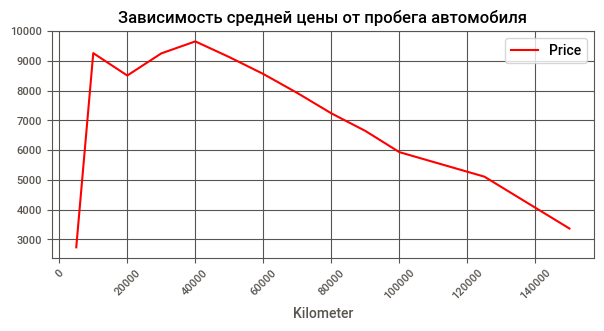

In [26]:
data.pivot_table(index='Kilometer',values='Price',aggfunc='mean').plot(y='Price',grid=True,rot=45,figsize=(7,3),\
                      title='Зависимость средней цены от пробега автомобиля',color='r');

Видим падение цены с ростом пробега.Поэтому пробуем заполнить нулевые цены средним значением,но с группировкой цены по километрам пробега.

Количество нулевых цен после обработки: 0


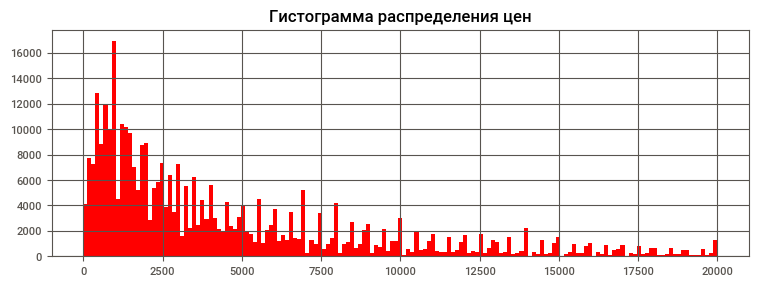

In [27]:
data['Price']=data['Price'].replace(0,None)# заменили нули на пропуски
data['Price']=data['Price'].fillna(data.groupby('Kilometer')['Price'].transform("median"))# заполнили средней ценой по пробегу
print('Количество нулевых цен после обработки:', data[data['Price'] == 0]['Price'].count())
_ = data.loc[:,['Price']].hist(figsize=(9,3),bins=157,color='r')
plt.title('Гистограмма распределения цен');

Избавились от нулевых цен и гистограмма показывает что больше всего регистрируется авто в диапазоне 1300 евро с плавным уменьшением с ростом стоимости автомобиля вплоть до 20000 евро.

In [28]:
data[data['RegistrationYear'] > 2019]['RegistrationYear'].value_counts()

9999    26
5000    17
3000     7
6000     5
7000     4
2500     4
4000     3
9000     3
5911     2
2222     2
5555     2
4500     2
2800     2
8000     2
9450     1
2290     1
6500     1
3700     1
5600     1
8500     1
3800     1
2900     1
4800     1
7500     1
3200     1
7100     1
8888     1
5300     1
4100     1
3500     1
8455     1
8200     1
9996     1
2200     1
2066     1
9229     1
5900     1
7800     1
Name: RegistrationYear, dtype: int64

In [29]:
data[data['RegistrationYear'] <=1950]['RegistrationYear'].value_counts()

1910    101
1000     37
1950     18
1937     11
1938      8
1929      7
1500      5
1800      5
1234      4
1943      4
1935      4
1945      4
1933      3
1932      3
1942      3
1930      3
1934      3
1936      3
1948      3
1111      3
1600      2
1944      2
1940      2
1928      2
1923      2
1941      2
1947      2
1300      2
1946      1
1949      1
1039      1
1931      1
1927      1
1925      1
1920      1
1919      1
1915      1
1400      1
1255      1
1253      1
1200      1
1688      1
1602      1
1001      1
Name: RegistrationYear, dtype: int64

In [30]:
a = data[data['RegistrationYear'] >=2019]['RegistrationYear']
b = data[data['RegistrationYear'] <=1950]['RegistrationYear']

In [31]:
data['RegistrationYear']=data['RegistrationYear'].replace(list(a),2007)
data['RegistrationYear']=data['RegistrationYear'].replace(list(b),1975)
data['RegistrationYear'].shape

(354369,)

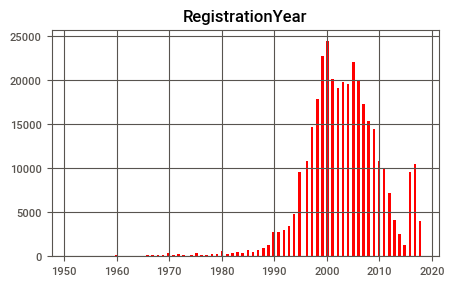

In [32]:
_ = data.loc[:,['RegistrationYear']].hist(figsize=(5,3),bins=137,color='r')

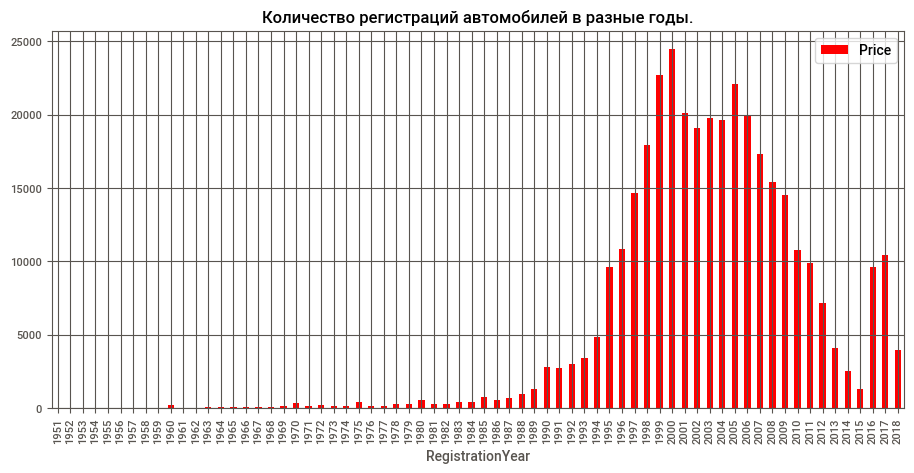

In [33]:
data.pivot_table(index='RegistrationYear',values='Price',aggfunc='count').plot(y='Price',\
                                            grid=True,rot=90,kind='bar',figsize=(11,5),\
                      title='Количество регистраций автомобилей в разные годы.',color='r');

Видим что для годов меньше 1950 и больше 2019 количество аномалий уж совсем не значительное,но удалять их не хочется. Поэтому раз уж спросить не у кого откуда они взялись и что бы это значило (можно было бы и вручную их исправить) использовал следующий подход: все аномалии больше значения года регистрации 2019 заменил на 2007 год который предкризисный в Европе и наверняка машин регистрировалось больше именно в этот период(понимаю что подтягиваю). Ну а год 1975 это уж когда в гору пошла послевоенная Германия.Наверное можно еще миллион решений придумать - но тут реально данные не очень чисты.

In [34]:
data['Power'].value_counts()

0        40225
75       24023
60       15897
150      14590
101      13298
         ...  
323          1
3454         1
1056         1
13636        1
1158         1
Name: Power, Length: 712, dtype: int64

Посмотрим на марки машин и попробуем прикинуть по нему величину мощности двигателя

In [35]:
data['Brand'].sort_values().unique()

array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
       'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda',
       'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart',
       'sonstige_autos', 'subaru', 'suzuki', 'toyota', 'trabant',
       'volkswagen', 'volvo'], dtype=object)

Встречаются бренды,которые предлагают мощные моторы поэтому поглядим и на модели.

In [36]:
data['Model'].sort_values().unique()

array(['100', '145', '147', '156', '159', '1_reihe', '1er', '200',
       '2_reihe', '300c', '3_reihe', '3er', '4_reihe', '500', '5_reihe',
       '5er', '601', '6_reihe', '6er', '7er', '80', '850', '90', '900',
       '9000', '911', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a8',
       'a_klasse', 'accord', 'agila', 'alhambra', 'almera', 'altea',
       'amarok', 'antara', 'arosa', 'astra', 'auris', 'avensis', 'aveo',
       'aygo', 'b_klasse', 'b_max', 'beetle', 'berlingo', 'bora',
       'boxster', 'bravo', 'c1', 'c2', 'c3', 'c4', 'c5', 'c_klasse',
       'c_max', 'c_reihe', 'caddy', 'calibra', 'captiva', 'carisma',
       'carnival', 'cayenne', 'cc', 'ceed', 'charade', 'cherokee',
       'citigo', 'civic', 'cl', 'clio', 'clk', 'clubman', 'colt', 'combo',
       'cooper', 'cordoba', 'corolla', 'corsa', 'cr_reihe', 'croma',
       'crossfire', 'cuore', 'cx_reihe', 'defender', 'delta', 'discovery',
       'doblo', 'ducato', 'duster', 'e_klasse', 'elefantino', 'eos',
       'escort', 'espac

Видим и маломощные пластмассовые 'trabant' ну и 'porsche' с 'mercedes_benz' и 'bmw'. Модели этих брендов достаточно мощные но возьмем за предел порядка 350 л.с. это будет прям с хорошим запасом и посмотрим количества аномалий вне этих пределов

In [37]:
data[data['Power'] < 15]['Power'].count()

40538

In [38]:
data[data['Power'] > 350]['Power'].count()

1203

Опять же удалять не будем, но кажется разумным найти среднее значение мощности без учета этих аномалий и уже потом заменить аномалии этим средним значением мощности.

In [39]:
power_media = data[(data['Power'] > 35) & (data['Power'] < 350)]['Power'].median()
print('Значение медианной мощности внутри аномалий :',power_media)

Значение медианной мощности внутри аномалий : 110.0


In [40]:
val_above = data[data['Power'] > 350]['Power']
data['Power']=data['Power'].replace(list(val_above),power_media)
data['Power']=data['Power'].replace(0,power_media)
print('Количество нулевой мощности после обработки:', data[data['Power'] == 0]['Power'].count())
data.shape

Количество нулевой мощности после обработки: 0


(354369, 10)

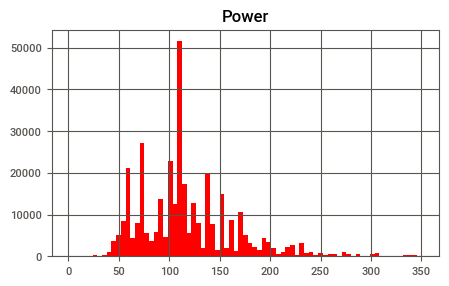

In [41]:
_ = data.loc[:,['Power']].hist(figsize=(5,3),bins=75,color='r')

Здесь замена аномалий выше 350 л.с. на медиану прошла быстро,но для мощности меньше 15 л.с. мой компьютер зависал и говорил,что не может сделать этого по причине нехватки памяти - поэтому я упростил задачу и заменил только нулевые значения . Старался делать честно.Гистограмма показала что аномалии исключены и похоже из невозможного получилось даже очень вменяемо и жизненно.

In [42]:
data.duplicated().sum()

51758

In [43]:
data=data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

Посмотрим что получилось с данными после предобработки и можно ли начинать заниматься моделями

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302611 entries, 0 to 302610
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             302611 non-null  int64  
 1   VehicleType       302611 non-null  object 
 2   RegistrationYear  302611 non-null  int64  
 3   Gearbox           302611 non-null  object 
 4   Power             302611 non-null  float64
 5   Model             302611 non-null  object 
 6   Kilometer         302611 non-null  int64  
 7   FuelType          302611 non-null  object 
 8   Brand             302611 non-null  object 
 9   NotRepaired       302611 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 23.1+ MB


In [45]:
data.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64

In [46]:
data.describe()

Price  RegistrationYear      Power  Kilometer
count 302611.000        302611.000 302611.000 302611.000
mean    4665.916          2003.183    119.211 126805.404
std     4585.750             7.544     48.847  38865.752
min        1.000          1951.000      1.000   5000.000
25%     1200.000          1999.000     86.000 125000.000
50%     2990.000          2003.000    110.000 150000.000
75%     6750.000          2008.000    143.000 150000.000
max    20000.000          2018.000    350.000 150000.000

In [47]:
display(data.head())
data.shape

Price VehicleType  RegistrationYear Gearbox   Power  Model  Kilometer  \
0    480       other              1993  manual 110.000   golf     150000   
1  18300       coupe              2011  manual 190.000  other     125000   
2   9800         suv              2004    auto 163.000  grand     125000   
3   1500       small              2001  manual  75.000   golf     150000   
4   3600       small              2008  manual  69.000  fabia      90000   

   FuelType       Brand NotRepaired  
0    petrol  volkswagen          no  
1  gasoline        audi         yes  
2  gasoline        jeep          no  
3    petrol  volkswagen          no  
4  gasoline       skoda          no

(302611, 10)

Пропуски заполнены,аномалии обработаны но есть минимальные значения равные 1 в столбцах цены и мощности (может это у них тоже несет какой то смысл - стоимость 1 евро может оценка как подарка от родственников) Будет интересно посмотреть как модели справятся с такими ситуациямию. Приступаем.

<Figure size 900x900 with 0 Axes>

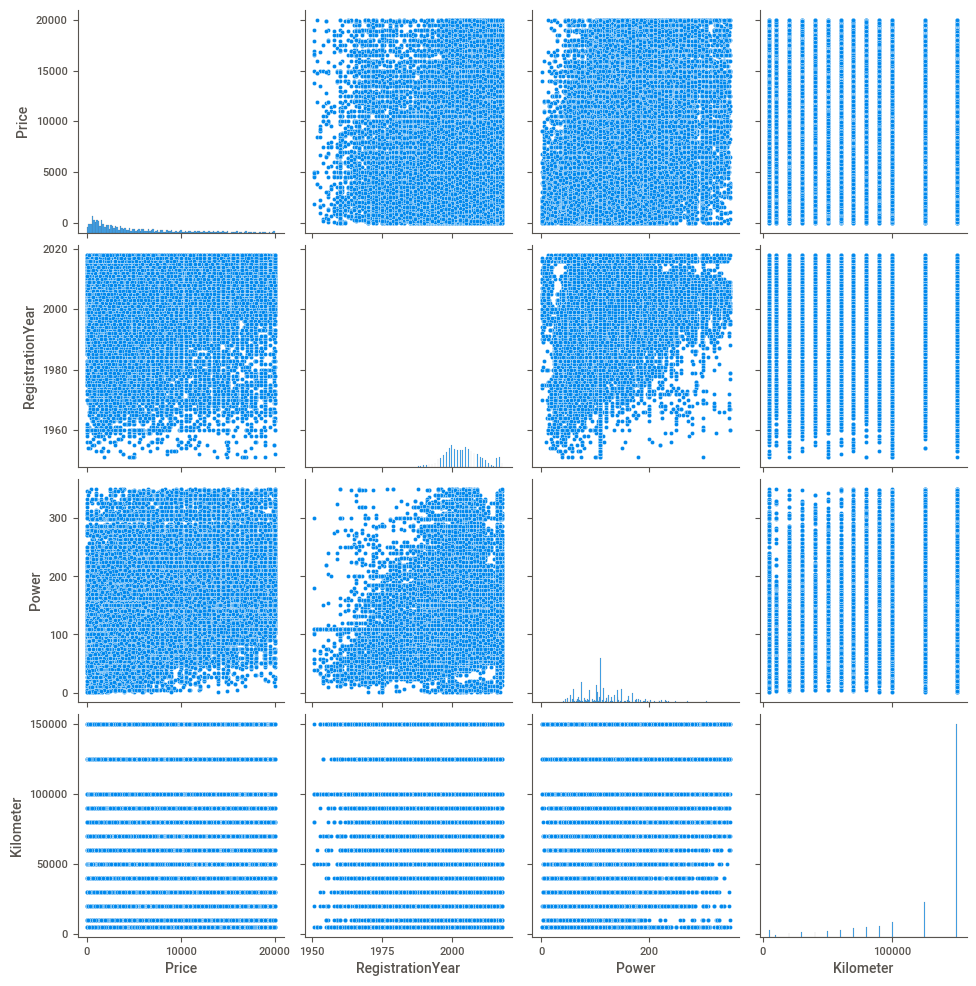

In [48]:
plt.figure(figsize=(9,9))
sns_plot = sns.pairplot(data);
sns.set(font_scale=1.3)

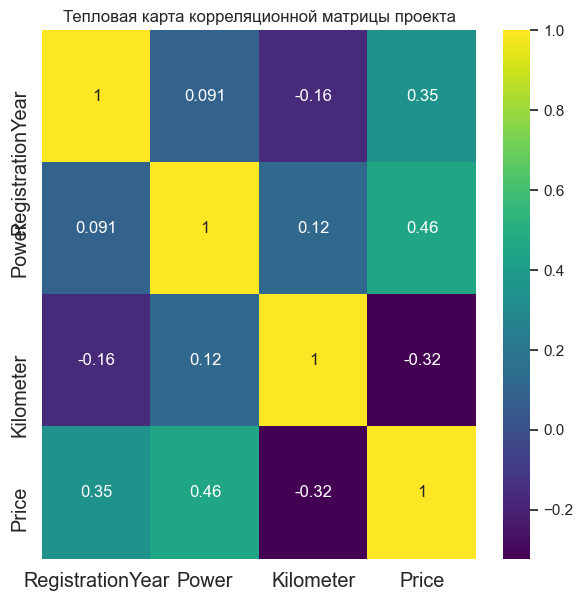

In [49]:
# строим тепловую карту корреляции признаков с целевой переменной 
f, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale=1.0)
cm = np.corrcoef(data[['RegistrationYear','Power','Kilometer','Price']].values.T)
sns.heatmap(cm,annot=True, ax=ax, cmap="viridis");
ax.set_xticklabels(['RegistrationYear','Power','Kilometer','Price'])    
ax.set_yticklabels(['RegistrationYear','Power','Kilometer','Price'])
ax.set_title('Тепловая карта корреляционной матрицы проекта');
plt.show()

Видим цена обратно коррелирует с пробегом и становится больше с ростом мощности и более поздними годами регистрации.
Интересно,сможет ли алгоритм вытащить отсюда хоть какие-то закономерности

## Обучение моделей

In [50]:
def make_features(data_prepr):
    
    features = data_prepr.drop(['Price'],axis=1)
    target = data_prepr['Price']
    features_train,features_test,target_train,target_test =\
                                                     train_test_split(features,target,\
                                                        test_size = 0.25,random_state = 12345)
                                                                    
    return  features,target,features_train,features_test,target_train,target_test  

In [51]:
features,target,features_train,features_test,target_train,target_test = make_features(data)

scaler_oe = OrdinalEncoder() 
X_train = scaler_oe.fit_transform(features_train)
X_test = scaler_oe.fit_transform(features_test)
y_train = target_train
y_test = target_test

print('Размер тренировочной выборки',X_train.shape, y_train.shape)
print('Размер тестовой выборки',X_test.shape, y_test.shape)

Размер тренировочной выборки (226958, 9) (226958,)
Размер тестовой выборки (75653, 9) (75653,)


In [52]:
%%time
#          DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor()

params_grid = {'max_depth':[1,3,7,9,15]}
regressor_dtr = GridSearchCV(model_dtr, param_grid=params_grid,cv=3,verbose=1)
regressor_dtr=regressor_dtr.fit(X_train,y_train)

print(regressor_dtr.best_score_)
print(regressor_dtr.best_estimator_.get_params())

Fitting 3 folds for each of 5 candidates, totalling 15 fits
0.7250474796355032
{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Wall time: 11.9 s


In [53]:
%%time
dtr =DecisionTreeRegressor(**regressor_dtr.best_params_)# определили модель с лучшими параметрами
t0=time()
dtr.fit(X_train,y_train)
fit_dtr=(time()-t0)
p0=time()
pred_test = dtr.predict(X_test)
pred_train = dtr.predict(X_train)
predict_dtr = time()-p0  
MSE_train = mean_squared_error(y_train,pred_train)
MSE_test = mean_squared_error(y_test,pred_test)
print('Значение RMSE на тренировочной выборке :', (MSE_train**0.5).round(3))
r_dtr = (MSE_test**0.5).round(3) 
print('Значение RMSE на тестовой выборке :', r_dtr)
print('Время обучения модели',fit_dtr)
print('Время предсказания модели',predict_dtr)

Значение RMSE на тренировочной выборке : 1831.361
Значение RMSE на тестовой выборке : 2520.387
Время обучения модели 1.5860662460327148
Время предсказания модели 0.0781095027923584
Wall time: 1.68 s


На простой модели и сразу требуемый результат - рассмотрим чуть подробнее

Wall time: 9.82 s


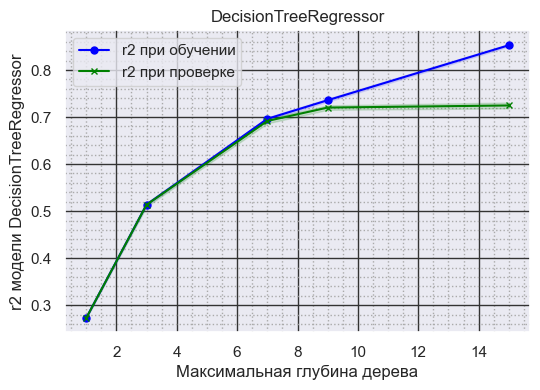

In [54]:
%%time
#         Строим кривую проверки
param_range =[1,3,7,9,15]

                     
                           
train_scores,test_scores=validation_curve(
                                         estimator=dtr,
                                         X=X_train,y=y_train,
                                         param_name='max_depth',
                                         param_range=param_range,cv=3,scoring='r2')
    
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) 
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)  

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='r2 при обучении')
plt.fill_between(param_range,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='-',marker='x',markersize=5,\
                 label='r2 при проверке');
plt.fill_between(param_range,test_mean + test_std,
                             test_mean - test_std,
                 
                            alpha=0.15,color='green');
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('DecisionTreeRegressor')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('r2 модели DecisionTreeRegressor')
plt.legend(loc='best');                 

Видим с ростом глубины дерева наблюдается дисперсия,поэтому вопрос:
стоит ли для получения большей метрики увеличивать глубину дерева или это может привести к переобучению модели и когда
необходимо прекратить.

Wall time: 12.6 s


<AxesSubplot:title={'center':'Digits Regression Learning Curve'}, xlabel='Training examples', ylabel='Score'>

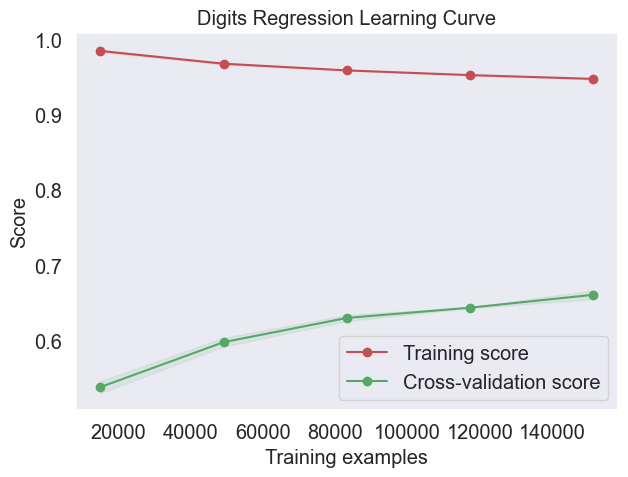

In [55]:
%%time
skplt.estimators.plot_learning_curve(DecisionTreeRegressor(), X_train, y_train,
                                     cv=3, shuffle=True, scoring="r2",
                                     n_jobs=1, figsize=(7,5), title_fontsize="large", text_fontsize="large",
                                     title="Digits Regression Learning Curve");

Наблюдаем сходимость метрики - с количеством данных все в порядке

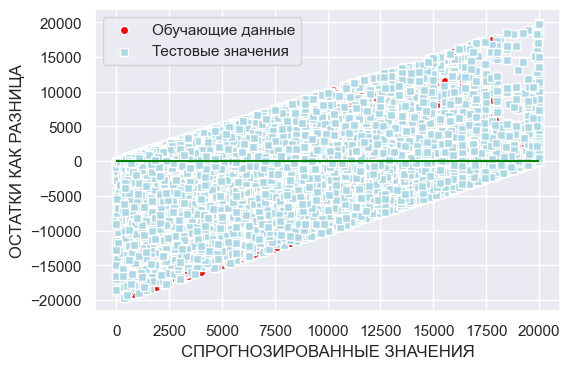

In [56]:
 # строим график остатков
plt.scatter(pred_train,pred_train-y_train,
           c='red',marker='o',edgecolor='white',
           label='Обучающие данные')
plt.scatter(pred_test,pred_test-y_test,
           c='lightblue',marker='s',edgecolor='white',
           label='Тестовые значения')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='best')
plt.hlines(y=0,xmin=0,xmax=20000,color='green',lw=1.5)
plt.show()

In [57]:
%%time
#   продолжим с RandomForestRegressor 
rf_regressor = RandomForestRegressor(n_jobs=1) 

param_grid = {
    "n_estimators": [5, 15, 25],
    "max_depth": [3, 5, 7]}
    
model_rf = RandomizedSearchCV(
    estimator=rf_regressor, param_distributions=param_grid,n_iter=3, cv=3, verbose=1, n_jobs=1,random_state=12345)

model_rf.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Wall time: 1min 4s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=1), n_iter=3,
                   n_jobs=1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [5, 15, 25]},
                   random_state=12345, verbose=1)

In [58]:
print(model_rf.best_score_)
print(model_rf.best_estimator_.get_params())

0.7053217112432731
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [59]:
%%time
rf_regressor =RandomForestRegressor(**model_rf.best_params_)# определили модель с лучшими параметрами
t0=time()
rf_regressor.fit(X_train,y_train)
fit_rfr=time()-t0
p0=time()
pred_test = rf_regressor.predict(X_test)
pred_train = rf_regressor.predict(X_train)
predict_rfr = time()-p0
MSE_train = mean_squared_error(y_train,pred_train)
MSE_test = mean_squared_error(y_test,pred_test)
print('Значение RMSE на тренировочной выборке :', (MSE_train**0.5).round(3))
r_rfr = (MSE_test**0.5).round(3)
print('Значение RMSE на тестовой выборке :',r_rfr)  
print('Время обучения модели', fit_rfr)
print('Время предсказания модели', predict_rfr)

Значение RMSE на тренировочной выборке : 2477.421
Значение RMSE на тестовой выборке : 2501.883
Время обучения модели 20.19476318359375
Время предсказания модели 0.9547338485717773
Wall time: 21.1 s


Результат не удовлетворительный - надо увеличивать количество деревьев и итерaций,но очень долго будет работать 
проверено на прошлых проектах.

In [60]:
%%time
#              Простая линейная регрессия

features_train = X_train
features_test = X_test
target_train = y_train
target_test = y_test


model_lr = LinearRegression()
t0=time()
model_lr.fit(features_train,target_train)
fit_lr=time()-t0
p0=time()
pred_test = model_lr.predict(features_test)
pred_train = model_lr.predict(features_train)
predict_lr = time()-p0
MSE_train = mean_squared_error(target_train,pred_train)
MSE_test = mean_squared_error(target_test,pred_test)

print('Значение RMSE на тренировочной выборке :', (MSE_train**0.5).round(3))
r_lr = (MSE_test**0.5).round(3)
print('Значение RMSE на тестовой выборке :', r_lr) 
print('Время обучения модели', fit_lr)
print('Время предсказания модели', predict_lr)

Значение RMSE на тренировочной выборке : 3427.544
Значение RMSE на тестовой выборке : 3410.861
Время обучения модели 0.18252325057983398
Время предсказания модели 0.024803876876831055
Wall time: 226 ms


In [61]:
%%time
# define the search space and the objecive function OPTUNA

def objective(trial):
    alpha = trial.suggest_categorical("alpha",np.linspace(0.0001,10.0))
    intercept = trial.suggest_categorical("fit_intercept", [True, False])
    tol = trial.suggest_categorical("tol", np.linspace(0.1,15.0))
    solver = trial.suggest_categorical("solver", ["auto","svd","lsqr","sag"])

    ## Create Model
    regressor = Ridge(alpha=alpha,fit_intercept=intercept,tol=tol,solver=solver)
    ## Fit Model
    regressor = regressor.fit(features_train,target_train)
    
    return  mean_squared_error(target_test, regressor.predict(features_test))

Wall time: 0 ns


In [62]:
%%time

study = optuna.create_study(study_name="RidgeRegression")
study.optimize(objective, n_trials=15)

[I 2022-08-12 00:01:53,457] A new study created in memory with name: RidgeRegression
[I 2022-08-12 00:01:53,681] Trial 0 finished with value: 11658244.2210157 and parameters: {'alpha': 6.53064693877551, 'fit_intercept': False, 'tol': 15.0, 'solver': 'svd'}. Best is trial 0 with value: 11658244.2210157.
[I 2022-08-12 00:01:53,740] Trial 1 finished with value: 11658243.89595248 and parameters: {'alpha': 1.4286571428571428, 'fit_intercept': False, 'tol': 3.7489795918367346, 'solver': 'auto'}. Best is trial 1 with value: 11658243.89595248.
[I 2022-08-12 00:01:53,897] Trial 2 finished with value: 11658244.416656118 and parameters: {'alpha': 9.387761224489795, 'fit_intercept': False, 'tol': 3.140816326530612, 'solver': 'svd'}. Best is trial 1 with value: 11658243.89595248.
[I 2022-08-12 00:01:53,968] Trial 3 finished with value: 16579375.29414846 and parameters: {'alpha': 6.734726530612244, 'fit_intercept': True, 'tol': 2.836734693877551, 'solver': 'lsqr'}. Best is trial 1 with value: 116582

Wall time: 1.69 s


In [63]:
print("Лучший параметр модели : {}".format(study.best_params))
print("\nЛучшее значение MSE : {}".format(study.best_value))


Лучший параметр модели : {'alpha': 7.346965306122448, 'fit_intercept': True, 'tol': 0.4040816326530612, 'solver': 'auto'}

Лучшее значение MSE : 11633979.176078554


In [64]:
study.trials_dataframe()

number        value             datetime_start          datetime_complete  \
0        0 11658244.221 2022-08-12 00:01:53.462082 2022-08-12 00:01:53.681483   
1        1 11658243.896 2022-08-12 00:01:53.681483 2022-08-12 00:01:53.739149   
2        2 11658244.417 2022-08-12 00:01:53.741133 2022-08-12 00:01:53.881688   
3        3 16579375.294 2022-08-12 00:01:53.897309 2022-08-12 00:01:53.968991   
4        4 11658243.958 2022-08-12 00:01:53.968991 2022-08-12 00:01:54.114895   
5        5 16579375.294 2022-08-12 00:01:54.130513 2022-08-12 00:01:54.202495   
6        6 11633979.263 2022-08-12 00:01:54.202495 2022-08-12 00:01:54.379293   
7        7 16579375.294 2022-08-12 00:01:54.379293 2022-08-12 00:01:54.461580   
8        8 16579375.294 2022-08-12 00:01:54.464562 2022-08-12 00:01:54.537727   
9        9 12363665.218 2022-08-12 00:01:54.540705 2022-08-12 00:01:54.769859   
10      10 11633979.176 2022-08-12 00:01:54.785479 2022-08-12 00:01:54.855820   
11      11 11633979.176 2022-08-12 00:01:54.857805 2022-08-12 00:01:54.925370   
12      12 11633979.176 2022-08-12 00:01:54.928348 2022-08-12 00:01:54.996110   
13      13 11633979.176 2022-08-12 00:01:54.999091 2022-08-12 00:01:55.067411   
14      14 11633979.176 2022-08-12 00:01:55.070389 2022-08-12 00:01:55.139005   

                 duration  params_alpha  params_fit_intercept params_solver  \
0  0 days 00:00:00.219401         6.531                 False           svd   
1  0 days 00:00:00.057666         1.429                 False          auto   
2  0 days 00:00:00.140555         9.388                 False           svd   
3  0 days 00:00:00.071682         6.735                  True          lsqr   
4  0 days 00:00:00.145904         2.449                 False           svd   
5  0 days 00:00:00.071982         8.163                  True          lsqr   
6  0 days 00:00:00.176798         7.551                  True           svd   
7  0 days 00:00:00.082287         7.551                  True          lsqr   
8  0 days 00:00:00.073165         0.612                  True          lsqr   
9  0 days 00:00:00.229154         7.551                  True           sag   
10 0 days 00:00:00.070341         7.347                  True          auto   
11 0 days 00:00:00.067565         7.347                  True          auto   
12 0 days 00:00:00.067762         7.347                  True          auto   
13 0 days 00:00:00.068320         7.347                  True          auto   
14 0 days 00:00:00.068616         7.347                  True          auto   

    params_tol     state  
0       15.000  COMPLETE  
1        3.749  COMPLETE  
2        3.141  COMPLETE  
3        2.837  COMPLETE  
4       12.567  COMPLETE  
5       12.263  COMPLETE  
6        0.404  COMPLETE  
7        9.527  COMPLETE  
8        1.924  COMPLETE  
9        3.445  COMPLETE  
10       0.404  COMPLETE  
11      10.439  COMPLETE  
12      10.439  COMPLETE  
13       0.404  COMPLETE  
14      10.135  COMPLETE

In [65]:
%%time
ridge = Ridge(**study.best_params)# cоздание мадели с лучшими параметрами
ridge.fit(features_train,target_train)
pred_train = ridge.predict(features_train)
pred_test = ridge.predict(features_test)

Wall time: 106 ms


In [66]:
print('Значение RMSE на тренировочной выборке :' ,(mean_squared_error(target_train,pred_train))**0.5)
print('Значение RMSE на тестовой выборке  :' ,(mean_squared_error(target_test,pred_test))**0.5)

Значение RMSE на тренировочной выборке : 3427.5437089727925
Значение RMSE на тестовой выборке  : 3410.8619403427274


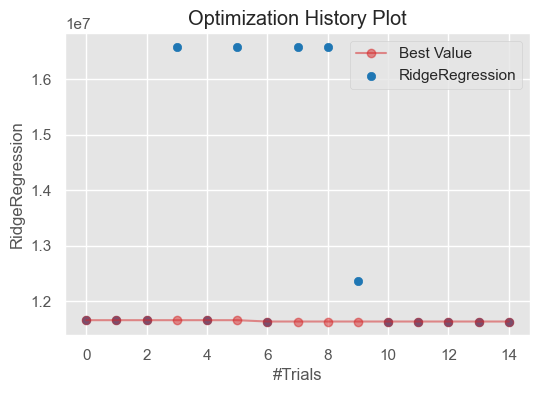

In [67]:
optuna.visualization.matplotlib.plot_optimization_history(study, target_name="RidgeRegression");

<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for MSE of RidgeRegression', ylabel='Hyperparameter'>

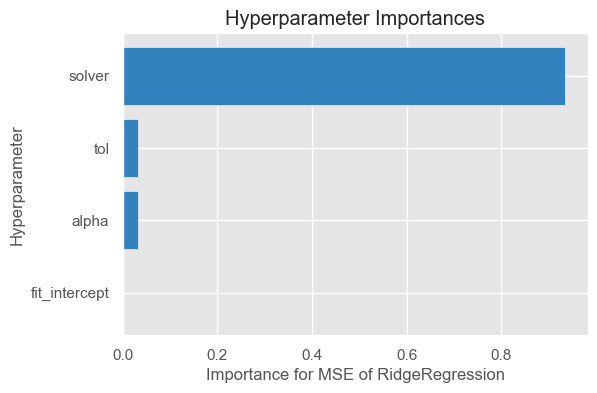

In [68]:
optuna.visualization.matplotlib.plot_param_importances(study, target_name="MSE of RidgeRegression")

Wall time: 1.81 s


<AxesSubplot:title={'center':' Learning Curve'}, xlabel='Training examples', ylabel='Score'>

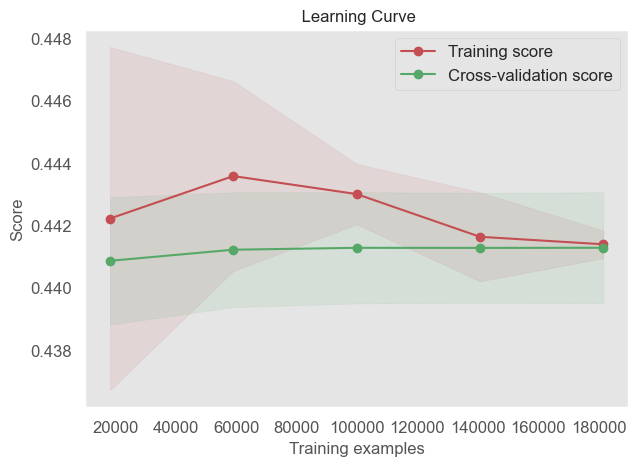

In [69]:
%%time
skplt.estimators.plot_learning_curve(Ridge(), features_train, target_train,
                                     cv=5, shuffle=True, scoring="r2",
                                     n_jobs=1, figsize=(7,5), title_fontsize="large", text_fontsize="large",
                                     title=" Learning Curve");

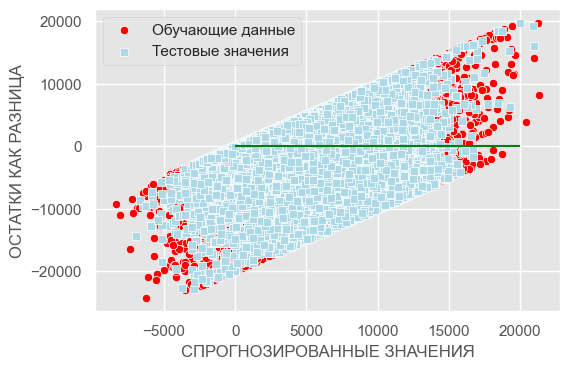

In [70]:
 # строим график остатков
plt.scatter(pred_train,pred_train-target_train,
           c='red',marker='o',edgecolor='white',
           label='Обучающие данные')
plt.scatter(pred_test,pred_test-target_test,
           c='lightblue',marker='s',edgecolor='white',
           label='Тестовые значения')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='best')
plt.hlines(y=0,xmin=0,xmax=20000,color='green',lw=1.5)
plt.show()

Для линейной регрессии и Ridge получен результат и он нас не устроил 
Значение RMSE на тренировочной выборке : 3427.544
Значение RMSE на тестовой выборке : 3410.861
Время обучения модели 0.17411303520202637
Время предсказания модели 0.01562047004699707

Попытки анализа моделей регрессии дали хороший результат только лишь для модели DecisionTreeRegressor. Далее будем рассматривать бустинговые модели.

Начнем с LightGBM

params - этот параметр принимает словарь, определяющий параметры алгоритма градиентных усиленных деревьев решений -просто нужно предоставить целевую функцию для начала работы на основе типа задачи (классификация/ регрессия).
train_set — этот параметр содержит информацию о значениях объектов и целевых значениях
valid_sets - список объектов, которые являются проверяющими наборами.
feature_name — список строк с имена признаков.
num_boost_round - количество  деревьев, которые будут использоваться в ансамбле.



In [71]:
print("LightGBM Version     : ", lgb.__version__)
print("Scikit-Learn Version : ", sklearn.__version__)

LightGBM Version     :  3.3.2
Scikit-Learn Version :  0.24.1


In [72]:
features,target,features_train,features_test,target_train,target_test = make_features(data)
scaler_oe = OrdinalEncoder()

features_train = scaler_oe.fit_transform(features_train)
features_test = scaler_oe.fit_transform(features_test)

print('Размер тренировочной выборки',features_train.shape, target_train.shape)
print('Размер тестовой выборки',features_test.shape, target_test.shape)

Размер тренировочной выборки (226958, 9) (226958,)
Размер тестовой выборки (75653, 9) (75653,)


In [73]:
train_dataset = lgb.Dataset(features_train, target_train, feature_name=features.columns.tolist())
test_dataset = lgb.Dataset(features_test, target_test, feature_name=features.columns.tolist())


In [74]:
%%time
t0=time()
booster = lgb.train({"objective": "regression"},#  определили задачу регрессии
                    train_set=train_dataset, valid_sets=test_dataset,
                    num_boost_round=35)
fit_lgb=time()-t0

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 226958, number of used features: 9
[LightGBM] [Info] Start training from score 4663.134302
[1]	valid_0's l2: 1.84971e+07
[2]	valid_0's l2: 1.64363e+07
[3]	valid_0's l2: 1.47554e+07
[4]	valid_0's l2: 1.33528e+07
[5]	valid_0's l2: 1.21889e+07
[6]	valid_0's l2: 1.12291e+07
[7]	valid_0's l2: 1.04393e+07
[8]	valid_0's l2: 9.76788e+06
[9]	valid_0's l2: 9.15539e+06
[10]	valid_0's l2: 8.66954e+06
[11]	valid_0's l2: 8.22457e+06
[12]	valid_0's l2: 7.88129e+06
[13]	valid_0's l2: 7.54325e+06
[14]	valid_0's l2: 7.26068e+06
[15]	valid_0's l2: 7.01721e+06
[16]	valid_0's l2: 6.80194e+06
[17]	valid_0's l2: 6.63165e+06
[18]	valid_0's l2: 6.45169e+06
[19]	valid_0's l2: 6.31115e+06
[20]	vali

In [75]:
p0=time()
test_preds = booster.predict(features_test)
train_preds = booster.predict(features_train)
predict_lgb = time()-p0
print('Значение RMSE на тренировочной выборке :' ,(mean_squared_error(target_train,train_preds))**0.5)
r_lgb = (mean_squared_error(target_test,test_preds))**0.5
print('Значение RMSE на тестовой выборке  :' , r_lgb)
print('Время обучения модели', fit_lgb)
print('Время предсказания модели', predict_lgb)

Значение RMSE на тренировочной выборке : 2256.4115836941555
Значение RMSE на тестовой выборке  : 2284.8675008987784
Время обучения модели 1.2015111446380615
Время предсказания модели 0.8701868057250977


In [76]:
booster.num_trees()

35

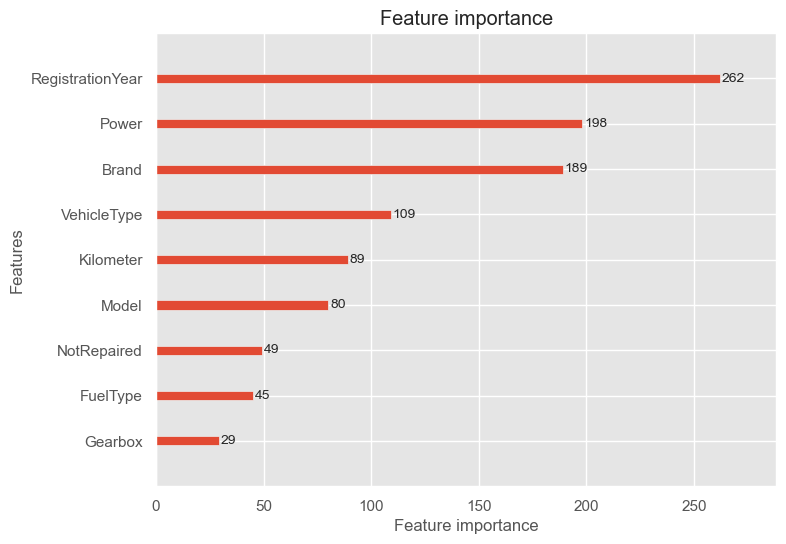

In [77]:
lgb.plot_importance(booster, figsize=(8,6));

Здесь создали LGBMModel прямо задав objective="regression" и поизменяли количеством деревьев и получили результат,удовлетворяющий требованию ТЗ:

[1]	Validation Set's rmse: 4300.82	Validation Set's l2: 1.84971e+07
[2]	Validation Set's rmse: 4054.17	Validation Set's l2: 1.64363e+07
[3]	Validation Set's rmse: 3841.27	Validation Set's l2: 1.47554e+07
[4]	Validation Set's rmse: 3654.14	Validation Set's l2: 1.33528e+07
[5]	Validation Set's rmse: 3491.26	Validation Set's l2: 1.21889e+07
[6]	Validation Set's rmse: 3350.99	Validation Set's l2: 1.12291e+07
[7]	Validation Set's rmse: 3231	Validation Set's l2: 1.04393e+07
[8]	Validation Set's rmse: 3125.36	Validation Set's l2: 9.76788e+06
[9]	Validation Set's rmse: 3025.79	Validation Set's l2: 9.15539e+06
[10]	Validation Set's rmse: 2944.41	Validation Set's l2: 8.66954e+06
[11]	Validation Set's rmse: 2867.85	Validation Set's l2: 8.22457e+06
[12]	Validation Set's rmse: 2807.36	Validation Set's l2: 7.88129e+06
[13]	Validation Set's rmse: 2746.5	Validation Set's l2: 7.54325e+06
[14]	Validation Set's rmse: 2694.56	Validation Set's l2: 7.26068e+06
[15]	Validation Set's rmse: 2649	Validation Set

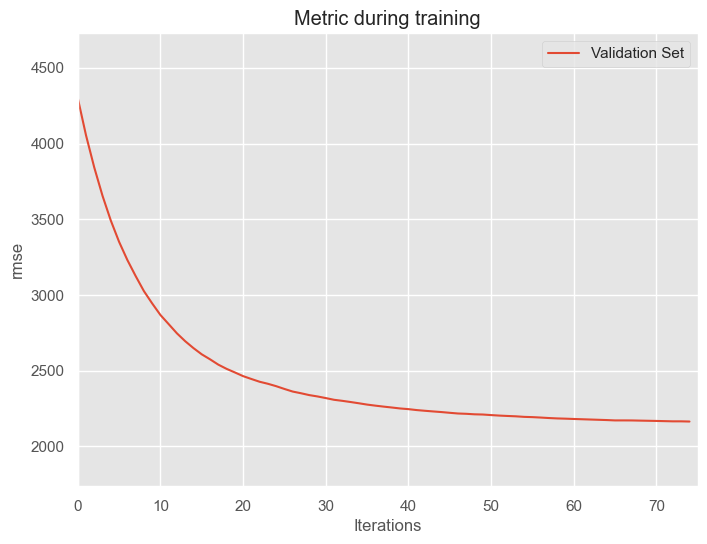

In [78]:
booster = lgb.LGBMModel(objective="regression", n_estimators=75,)

booster.fit(features_train, target_train,
            eval_set=[(features_test, target_test),], eval_metric="rmse", eval_names = ["Validation Set"],
            feature_name=features.columns.tolist())

lgb.plot_metric(booster, metric="rmse", figsize=(8,6));


Wall time: 40.8 s


<AxesSubplot:title={'center':' Learning Curve'}, xlabel='Training examples', ylabel='Score'>

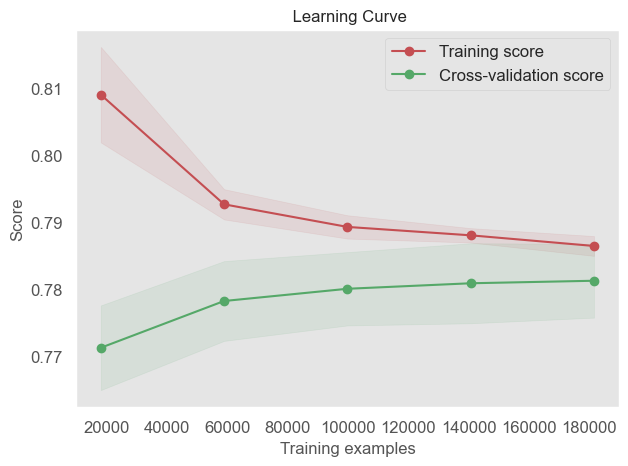

In [79]:
%%time
skplt.estimators.plot_learning_curve(booster, features_train, target_train,
                                     cv=5, shuffle=True, scoring="r2",
                                     n_jobs=1, figsize=(7,5), title_fontsize="large", text_fontsize="large",
                                     title=" Learning Curve");

Создав и обучив модель LGBMModel мы построили график тестовых значений RMSE от количества деревьев модели - ну просто супер как все реализовано в  LightGBM.

In [ ]:
#!pip install interpret
from interpret import glassbox
glassbox_boosting = glassbox.ExplainableBoostingRegressor(feature_names=features.columns)

print(type(glassbox_boosting))

glassbox_boosting.fit(X_train, y_train)

print("\nTrain R2 Score : %.2f"%glassbox_boosting.score(X_train, y_train))
print("Test  R2 Score : %.2f"%glassbox_boosting.score(X_test, y_test))

boosting_global_explanation = glassbox_boosting.explain_global(name="AUTOS")
boosting_local_explanation = glassbox_boosting.explain_local(X_test_boston, Y_test_boston,
                                                  name="AUTOS")

show(boosting_global_explanation)
show(boosting_local_explanation)

In [ ]:
from interpret import perf

regression_perf = perf.RegressionPerf(glassbox_boosting.predict, feature_names=features.columns)
regression_explanation = regression_perf.explain_perf(X_test, y_test)

show(regression_explanation)

Теперь рассмотрим CatBoost - универсальный оценщик,который может обрабатывать как классификационные,
так и регрессионные наборы данных с настройками.
Конструктор CatBoost принимает только один параметр с именем, который является словарем параметров, используемых
для создания оценщика. Он имеет один основной параметр, названный на основе значения этого параметра и
который определяет, является ли задача регрессией или классификацией. 

Начнем изучение с выбора гиперпараметров по сетке и зафиксируем их:

param_grid - принимает словарь имен параметров и список значений, которые можно попробовать для этих параметров.
features - признаки,принимает массив numpy, кадр данных панд, catboost.
target — принимает целевые значения данных. 
cv — принимает целочисленные классы сплиттеров данных (KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit).
Если мы дадим целое число в качестве входных данных, то для обучения будет создано много складок данных. Значение параметра по
умолчанию — 3.
calc_cv_statistics — принимает логическое значение, указывающее, следует ли вычислять статистику перекрестной проверки. Значениепо умолчанию — True.
refit — принимает логическое значение, указывающее, следует ли обучать модель с использованием наилучшего параметра, найденного
с помощью перекрестной проверки. Значение по умолчанию — True.
stratified — выполняет стратифицированное секционирование набора данных таким образом, чтобы пропорция класса поддерживалась в 
наборах. Значение по умолчанию — True


Список важных атрибутов и методов оценки CatBoost:

best_score_ - возвращает лучший балл модели.
classes_ -    возвращает список классов для задачи классификации.
feature_names_ —  возвращает список имен компонентов.
feature_importances_ — возвращает важность признаков.
learning_rate_ - возвращает скорость обучения алгоритма.
random_seed_ — возвращает случайное семя, из которого были назначены исходные веса модели.
tree_count_ - возвращает количество деревьев в ансамбле.
n_features_in_ — возвращает количество функций, используемых для обучения модели.
evals_result_ - возвращает словарь оценки. Если мы предоставили оценочный набор, то результаты оценки для него будут включены.


Выберем параметры CatBoost с помощью решетки

In [ ]:
%%time
booster = CatBoost()

params = {
            'iterations':[10,50,150],
            'learning_rate':[0.01, 0.1],
            'bootstrap_type':['Bayesian', 'No'],
             
}

search_results = booster.grid_search(params, features_train, target_train, cv=5, )

print("\nЛучшие параметры модели : ", search_results['params'])
print('Список всех параметров модели',booster.get_all_params())

In [ ]:
%%time
regressor_catb =CatBoost(search_results['params'])# определяем лучшую модель 
t0=time()
regressor_catb.fit(features_train, target_train)
regressor_catb.set_feature_names(features.columns.tolist())
fit_cat=time()-t0

In [ ]:
p0=time()
test_preds = regressor_catb.predict(features_test)
train_preds = regressor_catb.predict(features_train)
predict_cat = time()-p0
print('Значение RMSE на тренировочной выборке :' ,(mean_squared_error(target_train,train_preds)**0.5).round(1))
r_cat = (mean_squared_error(target_test,test_preds)**0.5).round(1)
print('Значение RMSE на тестовой выборке  :' ,r_cat)
print('Время обучения модели', fit_cat)
print('Время предсказания модели', predict_cat)

Значение RMSE на тренировочной выборке : 2162.6
Значение RMSE на тестовой выборке  : 2170.9
Время обучения модели 11.095829248428345
Время предсказания модели 1.4127588272094727

Но в решетке нет параметра RMSE, поэтому можно его задать напрямую в модели - посмотрим результат при 150 итерациях функции потерь RMSE.

In [ ]:
from catboost import CatBoost

booster = CatBoost(params={'iterations':150, 'verbose':10, 'loss_function':'RMSE'})

booster

In [ ]:
booster.fit(features_train, target_train)
booster.set_feature_names(features.columns.tolist())


In [ ]:
test_preds = booster.predict(features_test)
train_preds = booster.predict(features_train)
print('Значение RMSE на тренировочной выборке :' ,(mean_squared_error(target_train,train_preds)**0.5).round(1))
print('Значение RMSE на тестовой выборке  :' ,(mean_squared_error(target_test,test_preds)**0.5).round(1))

In [ ]:
print("Параметры заданные при создании модели : ",booster.get_params())
print("\nВсе возможные параметры этой модели : ",booster.get_all_params())

In [ ]:
print("\nЛучшая RMSE модели: ",booster.get_best_score())
print("\nКатегориальные признаки модели : ",booster.get_cat_feature_indices())
print("\nВажные признаки модели       : ",booster.get_feature_importance())
booster.get_feature_importance(prettified=True)

Cравним результаты RMSE для двух оценщиков с разными параметрами шага обучения.

In [ ]:
booster1 = CatBoost({'verbose':0, 'iterations':100, 'learning_rate':0.1, 'bootstrap_type':'Bayesian'})
booster1.fit(features_train,target_train, eval_set=(features_test,target_test))
booster1.set_feature_names(features.columns.tolist())
test_preds = booster1.predict(features_test)
train_preds = booster1.predict(features_train)

booster2 = CatBoost({'verbose':0, 'iterations':100, 'learning_rate':0.3, 'bootstrap_type':'No'})
booster2.fit(features_train,target_train, eval_set=(features_test,target_test))
booster2.set_feature_names(features.columns.tolist())
test_preds = booster2.predict(features_test)
train_preds = booster2.predict(features_train)

In [ ]:
booster1.compare(booster2, data=Pool(features_test,target_test), metrics=["R2", "RMSE", "MAE"])

In [ ]:
booster = CatBoost({'verbose':0, 'iterations':150})
booster.fit(features_train,target_train, eval_set=(features_test,target_test), plot=True);
booster.set_feature_names(features.columns.tolist())

RMSE при обучении и проверки - нет слов как все удобно.

А теперь вне проекта исследуем CatВoostRegressor не будем кодировать категориальные признаки,подбор гиперпараметров сделаем на Gridrandomizer и посмотрим результат по метрике RMSE

In [ ]:
# определим столбцы object
types = pd.DataFrame(data.dtypes)
print('Столбцы с object данными:\n',list(types[types[0] == 'object'].index) )       

In [ ]:
data.loc[:,['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']]=\
        features.loc[:,['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']].astype('category')
data.info()

In [ ]:
features = data.drop(['Price'],axis=1)
target = data['Price']
features_train,features_test,target_train,target_test =\
                                                     train_test_split(features,target,\
                                                        test_size = 0.25,random_state = 12345)
print('Размер тренировочной выборки',features_train.shape, target_train.shape)
print('Размер тестовой выборки',features_test.shape, target_test.shape)    

In [ ]:
# столбцы с категориями
mylist = list(features.select_dtypes(include=['category']).columns)
print(mylist)

In [ ]:
#  список индексов столбцов с категориальными значениями
cat_index = [features.columns.get_loc(ind) for ind in mylist if ind in data]
print(cat_index)

In [ ]:
booster = CatBoostRegressor(iterations=150,learning_rate=0.5, verbose=False,)
cat_features_index = cat_index

booster.fit(features_train, target_train,
            eval_set=(features_test, target_test),
           cat_features=cat_features_index,plot=True);

booster.set_feature_names(features_train.columns.tolist())

test_preds = booster.predict(features_test)
train_preds = booster.predict(features_train)

print("\nTest  R2 : %.2f"%booster.score(features_test, target_test))
print("Train R2 : %.2f"%booster.score(features_train, target_train))

print('Значение RMSE на тренировочной выборке :' ,(mean_squared_error(target_train,train_preds)**0.5).round(1))

print('Значение RMSE на тестовой выборке  :' ,(mean_squared_error(target_test,test_preds)**0.5).round(1))


In [ ]:
 # строим график остатков
plt.scatter(train_preds,train_preds-target_train,
           c='red',marker='o',edgecolor='white',
           label='Обучающие данные')
plt.scatter(test_preds,test_preds-target_test,
           c='lightblue',marker='s',edgecolor='white',
           label='Тестовые значения')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='best')
plt.hlines(y=0,xmin=0,xmax=20000,color='green',lw=1.5)
plt.show()

In [ ]:
print("Параметры заданные при создании модели : ",booster.get_params())
print("\nВсе возможные параметры этой модели : ",booster.get_all_params())

In [ ]:
print("\nЛучшая RMSE модели: ",booster.get_best_score())
print("\nКатегориальные признаки модели : ",booster.get_cat_feature_indices())
print("\nВажные признаки модели       : ",booster.get_feature_importance())

In [ ]:
booster.get_feature_importance(prettified=True)

Cамая лучшая метрика в проекте получилась на CatBoostRegressor(iterations=150,learning_rate=0.5, verbose=False,)

Лучшая RMSE модели:  {'learn': {'RMSE': 2014.092936370166}, 'validation': {'RMSE': 2032.7788726882325}}


## Анализ моделей

Создадим таблицу с результатами RMSE и временем обучения моделей,но здесь только модели из задания проекта - самостоятельно исследованные не включены 

In [ ]:
d = {'model': ['DecisionTreeRegressor','RandomForestRegressor','LinearRegression','LightGBM','CatBoost'],\
     'RMSE':[r_dtr,r_rfr,r_lr,r_lgb,r_cat], \
     'fit_time': [fit_dtr,fit_rfr,fit_lr,fit_lgb,fit_cat],\
    'predict_time':[predict_dtr,predict_rfr,predict_lr,predict_lgb,predict_cat]}

display( pd.DataFrame(data=d))

In [ ]:
from interpret import data
from interpret import show

marginal = data.Marginal(feature_names=features.columns)
marginal_explanation = marginal.explain_data(X_train,y_train)


show(marginal_explanation)

Общий вывод проекта.

1. Сделана предобработка данных исходя из возможностей ничего просто так не удалять.
   Пропуски заполнены,аномалии обработаны,комментарии даны.
2. Созданы модели,выбраны гиперпараметры,модели обучены и сделаны предсказания для RMSE.
3. Составлена сводная таблица по моделям,значениям RMSE и времени их обучения.

Задача проекта поставлена не совсем корректно - или мы стараемся получить одинаковое время обучения и смотрим какие значения
RMSE достигнуты или достигаем минимального значения RMSE и смотрим какое время на это потрачено,т.е. классическая проблема
что система уравнений не разрешима,когда количество неизвестных больше количества уравнений - просто пытаюсь пошутить.
Но на самом деле конечно же LightGBM и CatBoost	просто супер модели и там конечно их еще изучать и изучать.
Спасибо.